In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import correlate
from scipy.stats import ttest_ind
import os
import pandas as pd
import datetime
import probing_model_predictions
import tensorflow as tf
from collections import defaultdict
import heapq
import time 
import json
from statsmodels.graphics.tsaplots import plot_acf
arr = np.load("./PEMS04/pems04.npz")
# only contains "data" key.


In [40]:
for i in range(8):
    d_one = np.load(f"interval_estimations_low_8_{i}_[1277,1327].npy", allow_pickle=True).item()
    d_four = np.load(f"interval_estimations_low_8_{i}.npy", allow_pickle=True).item()
    fin_d = {**d_one, **d_four}
    np.save(f"interval_estimations_low_8_{i}_all.npy", fin_d)

In [64]:
standard_devs_a414 = []
all_a414 = []
for name in ["end_of_day", "start_of_day", "largest_increasing", "smallest_increasing", "largest_decreasing"]:
    if name in {"start_of_day", "end_of_day"}:
        for num in range(32):
            d = np.load(f"interval_estimations_{name}_a414_{num}.npy",allow_pickle=True).item()
            for key in d:
#                 normalized_dkey = np.divide(np.array(d[key]),np.mean(d[key]))
                print(d[key])
                standard_devs_a414.append(np.std(d[key] ) )
                all_a414 += d[key]
    else:
        for num in range(8):
            d = np.load(f"interval_estimations_{name}_a414_{num}.npy",allow_pickle=True).item()
            for key in d:
#                 normalized_dkey = np.divide(np.array(d[key]),np.mean(d[key]))
                standard_devs_a414.append(np.std(d[key]))
                all_a414 += d[key]
print(standard_devs_a414, np.mean(standard_devs_a414),np.max(standard_devs_a414))
print(np.std(all_a414))

[96.08076753412804, 97.39066586261842, 95.55218006198, 95.505900909261, 93.99490056241432, 94.20152019146012, 96.05149146841794, 96.54546625148959, 96.90003717091025, 93.51064262411943, 94.82793200706563, 92.78294666365879, 93.66407035472916, 94.81404782068438, 95.39279685223975, 100.07792510346668, 96.1287149692454, 95.24640784031007, 94.54705948945953, 96.41467084717459, 99.77150098143554, 95.02659137510672, 93.95186393435408, 94.66793435375865, 95.06528056576485, 94.35815507028161, 97.72690084649295, 93.9285494118202, 96.29320901232522, 97.31241494126436, 94.82719755899615, 91.84107564862181, 94.54816359136163, 95.10406686183883, 94.20208295089442, 94.45458948466836, 94.11752976876933, 98.20178855046993, 95.00311467269572, 94.6187761934792, 95.29949811464402, 94.80817593016276, 99.89154611855018, 96.20886918611643, 96.2962926291838, 93.41442842454445, 95.40514904842144, 95.0889465518114, 94.5658113927376, 95.63076947375042, 93.08782149669601, 92.52852620293454, 95.88566557372489, 95

In [47]:
standard_devs_pems4 = []
all_pems4 = []
for name in ["start_end_day","high", "low", "largest_decreasing"]:
    if name == "start_end_day":
        for num in range(9):
            d = np.load(f"interval_estimations_start_of_day_pems4_{num}.npy",allow_pickle=True).item()
            assert len(d.keys()) == 2, "Not just 2 keys in start_end_day"
            for key in d:
                standard_devs_pems4.append(np.std(d[key]))
                all_pems4 += d[key]
        for num in range(9,32):
            d = np.load(f"interval_estimations_{name}_pems4_{num}.npy",allow_pickle=True).item()
            assert len(d.keys()) == 2, "Not just 2 keys in start_end_day"
            for key in d:
                standard_devs_pems4.append(np.std(d[key]))
                all_pems4 += d[key]
    else:
        for num in range(8):
            d = np.load(f"interval_estimations_{name}_4_{num}.npy",allow_pickle=True).item()
            for key in d:
                standard_devs_pems4.append(np.std(d[key]))
                all_pems4 += d[key]
print(standard_devs_pems4, np.mean(standard_devs_pems4),np.max(standard_devs_pems4))
print(np.std(all_pems4))

[0.03497352028763847, 0.03172993606426539, 0.026963944104192214, 0.032808181255984274, 0.03332359421577232, 0.0348073167526759, 0.0325201311109844, 0.031114859653658556, 0.0336820267532842, 0.03519544202254287, 0.03609016161180913, 0.028573561495375915, 0.0336239225273888, 0.03727168289696387, 0.033927086168464335, 0.03296751299880455, 0.030825604092453194, 0.029179057935355412, 0.03662537124755595, 0.033434139775006415, 0.028925477016656993, 0.03516054951173734, 0.03348281510454194, 0.033607068463857095, 0.03181103063408301, 0.03487951827003094, 0.03281451837291891, 0.029964044594377345, 0.03258682011425739, 0.029054574325786613, 0.02905992371560919, 0.03110645812226546, 0.031857101010801865, 0.03089471082731025, 0.03015453728461738, 0.03438645240728806, 0.03342726095091287, 0.031203478146738056, 0.036158614015053436, 0.029928735100779928, 0.03587296747913833, 0.029931387375781462, 0.03612066946384798, 0.03056245987092409, 0.03455756855701566, 0.03318638563430729, 0.03438153245877216,

In [4]:
standard_devs = []
all_pems8 = []
for name in ["start_end_day","high", "low", "largest_decreasing"]:
    if name == "start_end_day":
        for num in range(32):
            d = np.load(f"interval_estimations_{name}_pems8_{num}.npy",allow_pickle=True).item()
            for key in d:
                standard_devs.append(np.std(d[key]))
                all_pems8 += d[key]
    elif name == "low":
        for num in range(8):
            d = np.load(f"interval_estimations_{name}_8_{num}_all.npy",allow_pickle=True).item()
            for key in d:
                standard_devs.append(np.std(d[key]))
                all_pems8 += d[key]
    else:
        for num in range(8):
            d = np.load(f"interval_estimations_{name}_8_{num}.npy",allow_pickle=True).item()
            for key in d:
                standard_devs.append(np.std(d[key]))
                all_pems8 += d[key]

In [58]:
print(len(pems04_data["test_x"]))
print(len(pems08_data["test_x"]))

3394
3567


In [13]:
# Combine the first two interval estimations
# d1 = np.load("interval_estimations_high_4_0_small.npy", allow_pickle=True).item()
# d2 = np.load("interval_estimations_high_4_1_small.npy", allow_pickle=True).item()

# new_d = defaultdict(list)
# for small_dict in (d1,d2):
#     for key,value in small_dict.items():
#         new_d[key] += value
# np.save("interval_estimations_high_4_1.npy",new_d)

In [3]:
from ast import literal_eval
start_pems04 = set([tuple(val) for val in list(np.load("start_of_day_pems04.npy",allow_pickle=True))])
end_pems04 = set([tuple(val) for val in list(np.load("end_of_day_pems04.npy",allow_pickle=True))])


In [4]:
key_intervals_a414 = [("(589, 605)","(323, 339)","(645, 661)"),
                      ("(1167, 1183)","(1918, 1934)","(1604, 1620)")]

In [ ]:
for i1,i2,i3 in key_intervals_a414:
    for i in range(8):
        five_regions = {"R_1":[], "R_2":[], "R_3": [], 
               "R_4": [], "R_5": []}
        start_d = np.load(f"interval_estimations_start_of_day_a414_{i}.npy",allow_pickle=True).item()
        end_d = np.load(f"interval_estimations_end_of_day_a414_{i}.npy",allow_pickle=True).item()
        d1 = np.load(f"interval_estimations_largest_decreasing_a414_{i}.npy",allow_pickle=True).item()
        d2 = np.load(f"interval_estimations_smallest_increasing_a414_{i}.npy",allow_pickle=True).item()
        d3 = np.load(f"interval_estimations_largest_increasing_a414_{i}.npy",allow_pickle=True).item()
        for key in start_d:
            five_regions["R_4"] += list(np.subtract(start_d[key],13.677))
        for key in end_d:
            five_regions["R_5"] += list(np.subtract(end_d[key],13.677))
    #     fin_region_1 = [0]*500
    #     iter1 = 0
        for key in d3:
            if key == i1:
                five_regions["R_1"] += list(np.subtract(d3[key],13.677))
                break
    #         for i,val in enumerate(list(np.subtract(d3[key],13.677))):
    #             fin_region_1[i*5+iter1] = val
    #         iter1 += 1
    #     five_regions["R_1"] += list(np.mean(np.array(fin_region_1).reshape(-1, 5), axis=1))[::-1]
    #     fin_region_2 = [0]*500
    #     iter2 = 0
        for key in d2:
            if key == i2:
                five_regions["R_2"] += list(np.subtract(d2[key],13.677))
                break
#             for i,val in enumerate(list(np.subtract(d2[key],13.677))):
#                 fin_region_2[i*5+iter2] = val
#             iter2 += 1
#         five_regions["R_2"] += list(np.mean(np.array(fin_region_2).reshape(-1, 5), axis=1))[::-1]
#         fin_region_3 = [0]*500
#         iter3 = 0
        for key in d1:
            if key == i3:
                five_regions["R_3"] += list(np.subtract(d1[key],13.677))
                break
#             for i,val in enumerate(list(np.subtract(d1[key],13.677))):
#                 fin_region_3[i*5+iter3] = val
#             iter3 += 1
#         five_regions["R_3"] += list(np.mean(np.array(fin_region_3).reshape(-1, 5), axis=1))[::-1]
        for j in range(0,100,25):
            print(j,j+25)
            p_val_1_v_3, lst_13 = run_bootstrap(five_regions["R_1"][j:j+25],five_regions["R_3"][j:j+25])
            p_val_1_v_5, lst_15 = run_bootstrap(five_regions["R_1"][j:j+25], five_regions["R_5"][j:j+25])
            print("R1 - R3", p_val_1_v_3)
            print("Percentile", np.percentile(lst_13,0.15625/2), np.percentile(lst_13,(100-(0.15625/2) )))
            print("R1 - R5", p_val_1_v_5)
            print(np.percentile(lst_15,0.15625/2), np.percentile(lst_15,100-(0.15625/2)))
        print("---------")
#         print(run_bootstrap(five_regions["R_2"][:25], five_regions["R_1"][:25]),
#               run_bootstrap(five_regions["R_2"][25:50], five_regions["R_1"][25:50]),
#               run_bootstrap(five_regions["R_2"][50:75], five_regions["R_1"][50:75]),
#               run_bootstrap(five_regions["R_2"][75:], five_regions["R_1"][75:]))
#         plt.hist(five_regions["R_1"][25:], alpha=0.3,edgecolor="black",label="Largest Increases")
#         plt.hist(five_regions["R_2"][25:], alpha=0.5, edgecolor="black",label="Smallest Increases")
#         plt.legend()
#         plt.hist(five_regions["R_3"], alpha=0.1, edgecolor="black",label="Largest Decreases")

#              run_bootstrap(five_regions["R_2"], five_regions["R_3"]),
#              run_bootstrap(five_regions["R_3"], five_regions["R_4"]),
#              run_bootstrap(five_regions["R_4"], five_regions["R_5"]))
#     plt.hist(five_regions["R_1"], alpha=0.3,edgecolor="black",label="Largest Increases")
#     plt.hist(five_regions["R_2"], alpha=0.5, edgecolor="black",label="Smallest Increases")
#     plt.hist(five_regions["R_3"], alpha=0.1, edgecolor="black",label="Largest Decreases")
#     plt.hist(five_regions["R_4"],alpha=0.5,edgecolor="black",label="Start of Day Traffic")
#     plt.hist(five_regions["R_5"],alpha=0.1,edgecolor="black", label="End of Day Traffic")
#     plt.xlabel("Increase in Prediction MAE after masking regions")
#     plt.legend()
#     plt.ylabel("Count")
#     plt.title("Increases in Prediction MAE over Changes in Traffic Flow")
#     break
    # plt.savefig("a414_mae_increasing.png")

In [5]:
key_intervals_pems04 = [("(1142, 1192)","(538, 588)","(1082, 1132)"),
                        ("(2577, 2627)","(2282, 2332)","(2503, 2553)"),
                        ("(2861, 2911)",'(2542, 2592)','(2781, 2831)'),
                        ("(3156, 3206)","(2835, 2885)","(3067, 3117)")]

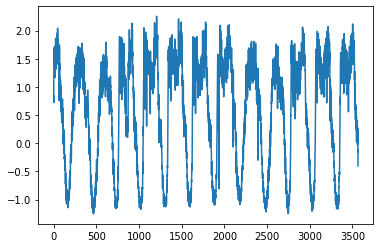

In [96]:
plt.plot(pems08_data["test_x"][:,0,0,0])

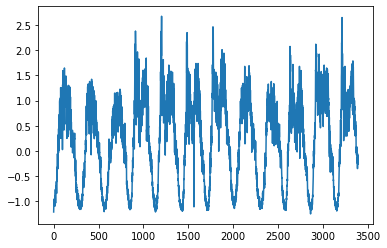

In [95]:
plt.plot(pems04_data["test_x"][:,0,0,0])

In [90]:
# means_4_15 = []
# lower_quantiles_4_15 = []
# upper_quantiles_4_15 = []

for i1,i2,i3 in key_intervals_pems04[-1:]:
    for i in range(8):
        five_regions = {"R_1":[], "R_2":[], "R_3": [], 
               "R_4": [], "R_5": []}
        d = np.load(f"interval_estimations_start_of_day_pems4_{i}.npy",allow_pickle=True).item()
        d1 = np.load(f"interval_estimations_largest_decreasing_4_{i}.npy",allow_pickle=True).item()
        d2 = np.load(f"interval_estimations_low_4_{i}.npy",allow_pickle=True).item()
        d3 = np.load(f"interval_estimations_high_4_{i+1}.npy",allow_pickle=True).item()
        if (i == 0):
            print(d1.keys())
            print(d2.keys())
            print(d3.keys())
        for key in d:
            if literal_eval(key) in start_pems04:
                five_regions["R_4"] += list(np.subtract(d[key],26.65))
            else:
                five_regions["R_5"] += list(np.subtract(d[key],26.65))
    #     fin_region_1 = [0]*500
    #     iter1 = 0
        for key in d3:
            five_regions["R_1"] += list(np.subtract(d3[key],26.65))
    #         for i,val in enumerate(list(np.subtract(d3[key],26.65))):
    #             fin_region_1[i*5+iter1] = val
#             if key == i1:
#                 five_regions["R_1"] += list(np.subtract(d3[key],26.65))
#                 break
    #         iter1 += 1
    #     five_regions["R_1"] += list(np.mean(np.array(fin_region_1).reshape(-1, 5), axis=1))[::-1]
    #     fin_region_2 = [0]*500
    #     iter2 = 0
        for key in d2:
            five_regions["R_2"] += list(np.subtract(d2[key],26.65))
    #         for i,val in enumerate(list(np.subtract(d2[key],26.65))):
    #             fin_region_2[i*5+iter2] = val
    #         iter2 += 1

#             if key == i2:
#                 five_regions["R_2"] += list(np.subtract(d2[key],26.65))
#                 break
    #     five_regions["R_2"] += list(np.mean(np.array(fin_region_2).reshape(-1, 5), axis=1))[::-1]
    #     fin_region_3 = [0]*500
    #     iter3 = 0
        for key in d1:
    #         for i,val in enumerate(list(np.subtract(d1[key],26.65))):
    #             fin_region_3[i*5+iter3] = val
    #         iter3 += 1
            five_regions["R_3"] += list(np.subtract(d1[key],26.65))
#             if key == i3:
#                 five_regions["R_3"] += list(np.subtract(d1[key],26.65))
#                 break
    #     five_regions["R_3"] += list(np.mean(np.array(fin_region_3).reshape(-1, 5), axis=1))[::-1]
#         for j in range(0,100,25):
#             p_val_1_v_3, lst_13 = run_bootstrap(five_regions["R_1"][j:j+25],five_regions["R_3"][j:j+25])
#             p_val_1_v_5, lst_15 = run_bootstrap(five_regions["R_1"][j:j+25], five_regions["R_5"][j:j+25])
            
#             lower_quantiles_4_15.append(np.percentile(lst_15,0.15625/2))
#             upper_quantiles_4_15.append(np.percentile(lst_15,100-(0.15625/2)))
#             means_4_15.append(np.mean(lst_15))
#             print("R1 - R3",p_val_1_v_3)
#             print("Percentile",np.percentile(lst_13,0.15625/2),np.percentile(lst_13,(100-(0.15625/2)) ))
#             print("R1 - R5",p_val_1_v_5)
#             print(np.percentile(lst_15,0.15625/2),np.percentile(lst_15,100-(0.15625/2) ))
#         print("---------")
#         plt.hist(five_regions["R_1"][:25], alpha=0.5, edgecolor="black",label="Largest Increases")
#         plt.hist(five_regions["R_2"][:25], alpha=0.3, edgecolor="black", color="purple",label="Smallest Increases")
#         plt.hist(five_regions["R_3"][:25], alpha=0.1, edgecolor="black",label="Largest Decreases")
#         plt.legend()
#         print(run_bootstrap(five_regions["R_1"][:25], five_regions["R_3"][:25]),
#               run_bootstrap(five_regions["R_1"][25:50], five_regions["R_3"][25:50]),
#               run_bootstrap(five_regions["R_1"][50:75], five_regions["R_3"][50:75]),
#               run_bootstrap(five_regions["R_1"][75:], five_regions["R_5"][75:]))
#         print("----------")
#         print(run_bootstrap(five_regions["R_1"][:25], five_regions["R_5"][:25]),
#               run_bootstrap(five_regions["R_1"][25:50], five_regions["R_5"][25:50]),
#               run_bootstrap(five_regions["R_1"][50:75], five_regions["R_5"][50:75]),
#               run_bootstrap(five_regions["R_1"][75:], five_regions["R_5"][75:]))
#         plt.hist(five_regions["R_3"][25:50], alpha=0.1, edgecolor="black",label="Largest Decreases")
#     plt.hist(five_regions["R_1"], alpha=0.5,edgecolor="black",label="Largest Increases")
#     plt.hist(five_regions["R_2"], alpha=0.3, edgecolor="black", color="purple",label="Smallest Increases")
#     plt.hist(five_regions["R_3"], alpha=0.1, edgecolor="black",label="Largest Decreases")
    # plt.hist(five_regions["R_4"],alpha=0.5,edgecolor="black",label="Start of Day Traffic")
    # plt.hist(five_regions["R_5"],alpha=0.1,edgecolor="black", label="End of Day Traffic")
#     print(np.mean(five_regions["R_1"]),np.mean(five_regions["R_4"]))
#     print(np.mean(five_regions["R_3"]),np.mean(five_regions["R_5"]))
#     plt.xlabel("Increase in Prediction MAE after masking regions")
#     plt.legend()
#     plt.ylabel("Count")
#     plt.title("Increases in Prediction MAE over Decreasing Traffic Flow")
    # plt.savefig("pems4_mae_decreasing.png")
    
p_val1, lst1 = run_bootstrap(five_regions["R_1"], five_regions["R_2"])
p_val2, lst2 = run_bootstrap(five_regions["R_2"], five_regions["R_3"])
print(p_val1,p_val2)
print(np.percentile(lst1,5/2),np.percentile(lst1,100-(5/2)))
print(np.percentile(lst2,5/2),np.percentile(lst2,100-(5/2)))



dict_keys(['(1082, 1132)', '(1344, 1394)', '(2503, 2553)', '(2781, 2831)', '(3067, 3117)'])
dict_keys(['(538, 588)', '(1106, 1156)', '(2282, 2332)', '(2542, 2592)', '(2835, 2885)'])
dict_keys(['(1142, 1192)', '(1709, 1759)', '(2577, 2627)', '(2861, 2911)', '(3156, 3206)'])
Mean Diff: -0.016882483849158803
initial_t_stat: -7.707211379112454
Mean Diff: -0.005172785832332494
initial_t_stat: -2.543190481779516
0.0 0.00485
-0.021155662653996463 -0.01257542067307407
-0.009124166635360531 -0.0012343801645159616


In [34]:
means_4_15_series = pd.Series(means_4_15)
lower_quantiles_4_15_series = pd.Series(lower_quantiles_4_15) 
upper_quantiles_4_15_series = pd.Series(upper_quantiles_4_15)

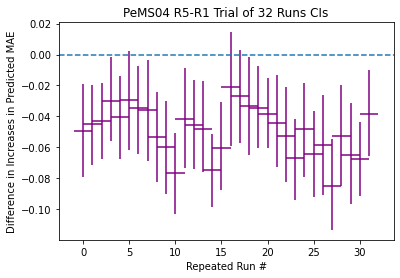

In [73]:
# plt.figure(figsize=(5, 3))
plt.tight_layout()
plt.errorbar(
    means_4_15_series.index,
    means_4_15_series,
    xerr=1,
    yerr=[means_4_15_series - lower_quantiles_4_15_series, upper_quantiles_4_15_series - means_4_15_series],
    linestyle='',
    color="purple"
)

plt.axhline(y=0,linestyle="--")
plt.title("PeMS04 R5-R1 Trial of 32 Runs CIs")
plt.xlabel("Repeated Run #")
plt.ylabel("Difference in Increases in Predicted MAE")
plt.savefig("repeated_runs_r5-r1_pems04.png")

In [25]:
def run_bootstrap(samp1, samp2, num_samples = 2*10**4):
    n1 = len(samp1)
    n2 = len(samp2)
    mean_diff_1 = np.mean(samp2)-np.mean(samp1)
    print("Mean Diff:", mean_diff_1)
#     print("Mean Diff",mean_diff_1,np.mean(samp2),np.mean(samp1))
    initial_t_stat = mean_diff_1/(np.sqrt((np.var(samp1,ddof=1)/n1)+\
                                      (np.var(samp2,ddof=1)/n2)))
    print("initial_t_stat:", initial_t_stat)
    all_mean_diffs = []
    samp1_new, samp2_new = produce_new_samples(samp1,samp2)
    num_larger = 0
    for sample in range(num_samples):
        resampled_1_original = np.random.choice(samp1, len(samp1),replace=True)
        resampled_2_original = np.random.choice(samp2, len(samp2),replace=True)
        resampled_1 = np.random.choice(samp1_new, len(samp1_new),replace=True)
        n1 = len(resampled_1)
        resampled_2 = np.random.choice(samp2_new, len(samp2_new),replace=True)
        n2 = len(resampled_2)
        size_var = np.sqrt((np.var(resampled_1,ddof=1)/n1)+(np.var(resampled_2,ddof=1)/n2))
        all_mean_diffs.append(np.mean(resampled_2_original)-np.mean(resampled_1_original))
#         if sample == 0:
#             print(np.mean(resampled_1),np.mean(resampled_2),
#                   np.mean(resampled_1)-np.mean(resampled_2))
        t_stat = (np.mean(resampled_2)-np.mean(resampled_1))/size_var
        if t_stat <= initial_t_stat:
            num_larger += 1
    return num_larger/num_samples, all_mean_diffs # returns p-value that means samp1 < samp2
def produce_new_samples(samp1,samp2):
    overall_mean = np.mean(samp1+samp2)
    # Agnostic of any distributional - bootstrapping.
    new_samp1 = samp1-np.mean(samp1)+overall_mean
    new_samp2 = samp2-np.mean(samp2)+overall_mean
    return new_samp1, new_samp2

In [20]:
key_intervals_pems8 = [('(1286, 1336)','(1560, 1610)','(1195, 1245)'),
                      ('(1572, 1622)',"(2154, 2204)",'(1491, 1541)'),
                      ('(2745, 2795)','(3005, 3055)','(3219, 3269)')]

In [87]:
# means_8_13_23 = []
# lower_quantiles_8_13_23 = []
# upper_quantiles_8_13_23 = []

# means_8_13_25 = []
# lower_quantiles_8_13_25 = []
# upper_quantiles_8_13_25 = []

five_regions = {"R_1":[], "R_2":[], "R_3": [], 
               "R_4": [], "R_5": []}

for i1, i2, i3 in key_intervals_pems8[2:]:
    for i in range(8):
#         five_regions = {"R_1":[], "R_2":[], "R_3": [], 
#                "R_4": [], "R_5": []}
        d = np.load(f"interval_estimations_start_end_day_pems8_{i}.npy",allow_pickle=True).item()
        d1 = np.load(f"interval_estimations_largest_decreasing_8_{i}.npy",allow_pickle=True).item()
        d2 = np.load(f"interval_estimations_low_8_{i}_all.npy",allow_pickle=True).item()
        d3 = np.load(f"interval_estimations_high_8_{i}.npy",allow_pickle=True).item()
        if (i==0):
            print(d3.keys())
            print(d2.keys())
            print(d1.keys())

        for key in d:
            if "start" in key:
                five_regions["R_4"] += list(np.subtract(d[key],18.28))
            else:
                five_regions["R_5"] += list(np.subtract(d[key],18.28))
    #     fin_region_1 = [0]*500
    #     iter1 = 0
        for key in d3:
    #         for i,val in enumerate(list(np.subtract(d3[key],18.28))):
    #             fin_region_1[i*5+iter1] = val
            five_regions["R_1"] += list(np.subtract(d3[key],18.28))

#             if key == i1:
#                 five_regions["R_1"] += list(np.subtract(d3[key],18.28))
#                 break
    #         iter1+=1
    #     five_regions["R_1"] += list(np.mean(np.array(fin_region_1).reshape(-1, 5), axis=1))[::-1]
    #     print(len(five_regions["R_1"]),five_regions["R_1"])
    #     fin_region_2 = [0]*500
    #     iter2 = 0
        for key in d2:
    #         for i,val in enumerate(list(np.subtract(d2[key],18.28))):
    #             fin_region_2[i*5+iter2] = val
            five_regions["R_2"] +=list(np.subtract(d2[key],18.28))
#             if key == i2:
#                 five_regions["R_2"] +=list(np.subtract(d2[key],18.28))
#                 break
    #         iter2 += 1
    #     five_regions["R_2"] += list(np.mean(np.array(fin_region_2).reshape(-1, 5), axis=1))[::-1]

    #     fin_region_3 = [0]*500
    #     iter3 = 0
        for key in d1:
            five_regions["R_3"] +=list(np.subtract(d1[key],18.28))
    #         for i,val in enumerate(list(np.subtract(d1[key],18.28))):
    #             fin_region_3[i*5+iter3] = val
    #         iter3 += 1
    #     five_regions["R_3"] += list(np.mean(np.array(fin_region_3).reshape(-1, 5), axis=1))[::-1]
#             if key == i3:
#                 five_regions["R_3"] +=list(np.subtract(d1[key],18.28))
#                 break
        
        
#         for j in range(0,100,25):
            
#             p_val_1_v_3, lst_13 = run_bootstrap(five_regions["R_2"][j:j+25], five_regions["R_3"][j:j+25])
#             p_val_1_v_5, lst_15 = run_bootstrap(five_regions["R_2"][j:j+25], five_regions["R_5"][j:j+25])
#             lower_quantiles_8_13_23.append(np.percentile(lst_13,0.15625/2))
#             upper_quantiles_8_13_23.append(np.percentile(lst_13,100-(0.15625/2)))
#             means_8_13_23.append(np.mean(lst_13))
#             means_8_13_25.append(np.mean(lst_15))
#             lower_quantiles_8_13_25.append(np.percentile(lst_15,0.15625/2))
#             upper_quantiles_8_13_25.append(np.percentile(lst_15,100-(0.15625/2)) )
#             print("R1 - R3",p_val_1_v_3)
#             print(np.percentile(lst_13,0.15625/2),np.percentile(lst_13,100-(0.15625/2)))
#             print("R1 - R5",p_val_1_v_5)
#             print(np.percentile(lst_15,0.15625/2),np.percentile(lst_15,100-(0.15625/2)))
#         print("---------")
#         print(run_bootstrap(five_regions["R_2"][:25], five_regions["R_3"][:25]),
#               run_bootstrap(five_regions["R_2"][25:50], five_regions["R_3"][25:50]),
#               run_bootstrap(five_regions["R_2"][50:75], five_regions["R_3"][50:75]),
#               run_bootstrap(five_regions["R_2"][75:], five_regions["R_3"][75:]))
#         print("--------")
#         print(run_bootstrap(five_regions["R_2"][:25], five_regions["R_5"][:25]),
#               run_bootstrap(five_regions["R_2"][25:50], five_regions["R_5"][25:50]),
#               run_bootstrap(five_regions["R_2"][50:75], five_regions["R_5"][50:75]),
#               run_bootstrap(five_regions["R_2"][75:], five_regions["R_5"][75:]))
    
#     plt.hist(five_regions["R_1"], alpha=0.3, edgecolor="black", color="purple", label="Largest Increases")
#     plt.hist(five_regions["R_2"], alpha=0.5, edgecolor="black", label="Smallest Increases")
#     plt.hist(five_regions["R_3"], alpha=0.1, edgecolor="black", label="Largest Decreases")
#     plt.hist(five_regions["R_4"], alpha=0.5, edgecolor="black",label="Start of Day")
#     plt.hist(five_regions["R_5"], alpha=0.1, edgecolor="black", label="End of Day")
#     print(np.mean(five_regions["R_3"]),np.mean(five_regions["R_5"]))
#     print(np.mean(five_regions["R_1"]),np.mean(five_regions["R_4"]))
#     plt.xlabel("Increase in Prediction MAE after masking regions")
#     plt.legend()
#     plt.ylabel("Count")
#     plt.title("Increases in Prediction MAE over Changes in Traffic Flow")
#     break
# plt.savefig("pems8_mae.png")
p_val1, lst1 = run_bootstrap(five_regions["R_2"], five_regions["R_1"])
p_val2, lst2 = run_bootstrap(five_regions["R_1"], five_regions["R_3"])
print(p_val1,p_val2)
print(np.percentile(lst1,5/2),np.percentile(lst1,100-(5/2)))
print(np.percentile(lst2,5/2),np.percentile(lst2,100-(5/2)))

dict_keys(['(737, 787)', '(1286, 1336)', '(1572, 1622)', '(2745, 2795)', '(3013, 3063)'])
dict_keys(['(1277, 1327)', '(1560, 1610)', '(2154, 2204)', '(2460, 2510)', '(3005, 3055)'])
dict_keys(['(943, 993)', '(1195, 1245)', '(1491, 1541)', '(1818, 1868)', '(3219, 3269)'])
Mean Diff: -0.01141193331204704
initial_t_stat: -14.053264464334324
Mean Diff: -0.031726905235874625
initial_t_stat: -38.85807117236811
0.0 0.0
-0.01302364261333544 -0.00986597530658049
-0.03330795916043936 -0.0301087583101749


In [78]:
# means_8_13_series = pd.Series(means_8_13)
# lower_quantiles_8_13_series = pd.Series(lower_quantiles_8_13) 
# upper_quantiles_8_13_series = pd.Series(upper_quantiles_8_13)
means_8_13_23_series = pd.Series(means_8_13_23)
lower_quantiles_8_13_23_series = pd.Series(lower_quantiles_8_13_23) 
upper_quantiles_8_13_23_series = pd.Series(upper_quantiles_8_13_23)
means_8_13_25_series = pd.Series(means_8_13_25)
lower_quantiles_8_13_25_series = pd.Series(lower_quantiles_8_13_25) 
upper_quantiles_8_13_25_series = pd.Series(upper_quantiles_8_13_25)

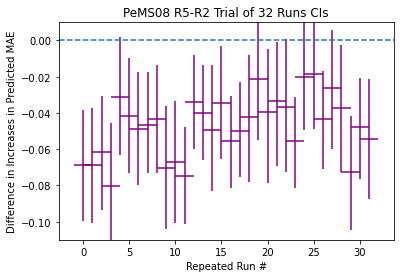

In [83]:
# plt.figure(figsize=(5, 5))
plt.errorbar(
    means_8_13_25_series.index,
    means_8_13_25_series,
    xerr=1,
    yerr=[means_8_13_25_series - lower_quantiles_8_13_25_series, 
          upper_quantiles_8_13_25_series - means_8_13_25_series],
    linestyle='',
    color="purple"
)
plt.ylim([-0.11,0.01])
plt.axhline(y=0,linestyle="--")
plt.title("PeMS08 R5-R2 Trial of 32 Runs CIs")
plt.xlabel("Repeated Run #")
plt.ylabel("Difference in Increases in Predicted MAE")
# plt.savefig("repeated_runs_r3-r1_pems08.png")
# plt.savefig("repeated_runs_r3-r2_pems08.png")
plt.savefig("repeated_runs_r5-r2_pems08.png")

In [ ]:
five_regions = {"R_1":[], "R_2":[], "R_3": [], 
               "R_4": [], "R_5": []}
for i in range(8):
    d = np.load(f"interval_estimations_start_end_day_pems4_{i}.npy",allow_pickle=True).item()
    d1 = np.load(f"interval_estimations_largest_decreasing_4_{i}.npy",allow_pickle=True).item()
    d2 = np.load(f"interval_estimations_low_4_{i}.npy",allow_pickle=True).item()
    d3 = np.load(f"interval_estimations_high_4_{i}.npy",allow_pickle=True).item()
    for key in d:
        if "start" in key:
            five_regions["R_4"] += d[key]
        else:
            five_regions["R_5"] += d[key]
    print(d3.keys(),d2.keys(),d1.keys())
    for key in d3:
        if key == '(2745, 2795)':
            five_regions["R_1"] += d3[key]
            break
    for key in d2:
        if key == '(2154, 2204)':
            five_regions["R_2"] += d2[key]
            break
    for key in d1:
        if key == "(3219, 3269)":
            five_regions["R_3"] += d1[key]
            break
# plt.hist(five_regions["R_1"],alpha=0.1,edgecolor="black")
plt.hist(five_regions["R_2"], alpha=0.1, edgecolor="black", color="purple")
plt.hist(five_regions["R_3"], alpha=0.1, edgecolor="black")
# plt.hist(five_regions["R_4"],alpha=0.1,edgecolor="black")
# plt.hist(five_regions["R_5"],alpha=0.1,edgecolor="black")

dict_keys(['(943, 993)', '(1195, 1245)', '(1491, 1541)', '(1818, 1868)', '(3219, 3269)']) [42.85085824819711, 42.85693359375, 42.79721304086539, 42.86469444861779, 42.84836050180289, 42.91005295973558, 42.88738544170673, 42.81024639423077, 42.81306340144231, 42.90982290414664, 42.88306603064904, 42.8872305063101, 42.87061016376202, 42.86259108323317, 42.86399489182692, 42.85525747445914, 42.89953143780048, 42.89853140024039, 42.9012451171875, 42.88038987379808, 42.83684833233173, 42.88626333383414, 42.85745474008414, 42.81840632512019, 42.89430119441106, 42.9070810171274, 42.90627817007211, 42.86066612830529, 42.83900334284856, 42.90956467848558, 42.90146108774039, 42.89203350360577, 42.84375939002404, 42.86114032451923, 42.91156944861779, 42.84255746694711, 42.8804931640625, 42.83516282301683, 42.8958740234375, 42.8117441030649, 42.84228046123798, 42.89459228515625, 42.85642653245192, 42.85468468299279, 42.85325270432692, 42.89644681490385, 42.88947002704327, 42.8258056640625, 42.8841

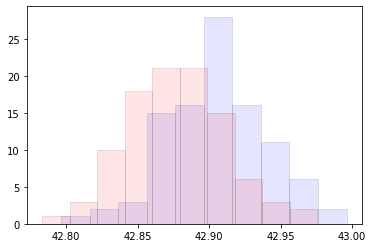

In [36]:
# Analyzing interval importance estimation results - pems08.
d = np.load("interval_estimations_start_end_day_pems8_6.npy",allow_pickle=True).item()
d1 = np.load("interval_estimations_largest_decreasing_8_6.npy",allow_pickle=True).item()
print(d1.keys(),d1['(943, 993)'])
plt.hist(d['start: (2438, 2488)'],color="blue",alpha=0.1,edgecolor="black")
plt.hist(d['end: (2964, 3014)'],color="red",alpha=0.1,edgecolor="black")
print(np.std(d['start: (2438, 2488)']))

In [33]:
# Analyzing interval importance estimation results - pems04.

In [ ]:
# Analyzing interval importance estimation results - a414.
d1 = np.load("interval_estimations_smallest_increasing_a414_5.npy",allow_pickle=True).item()
plt.hist(d1['(197, 213)'][:25],color="blue",alpha=0.1,edgecolor="black")
d2 = np.load("interval_estimations_largest_increasing_a414_5.npy",allow_pickle=True).item()
plt.hist(d2['(589, 605)'][:25],color="red",alpha=0.1,edgecolor="black")
print(d1.keys(),d2.keys())

In [92]:
arr_pems8 = np.load("./PEMS08/pems08.npz")
pems8_data = arr_pems8["data"]

pems08_data = np.load("../ASTGCN-r-pytorch-master/data/PEMS08/PEMS08_r1_d0_w0_astcgn.npz")
pems04_data = np.load("../ASTGCN-r-pytorch-master/data/PEMS04/PEMS04_r1_d0_w0_astcgn.npz")
A414df = pd.read_csv("A414.csv")

In [ ]:
def pplot(vec,alpha_val):
    plt.plot(list(range(len(vec))), vec,alpha=alpha_val)

In [ ]:

def plt_attr(col_name):
    plt.plot(list(range(len(pems04_data[col_name][:,0,0]))), pems04_data[col_name][:,0,0])

In [ ]:
def swap(x,y):
    temp = x
    x = y
    y = temp
    return x,y

In [ ]:
# plot_acf(pems08_data["test_x"][:,0,0,11],lags=1000)

In [ ]:
# 3684 possible sequences of 3394 observations to perturb.
# we may need to use joblib to pseudo-parallelize 
# 307*12
# per detector, shifted by at most 12 positions.

In [ ]:
'''
:brief: sample_similar_segments - prints the .
:param:
:param: ref_portion - 
:param: kwargs - key word arguments
:return: 
'''
def sample_similar_segments(data_vec, jth, ref_portion, **kwargs):
    if ("sample_type" in kwargs):
        if (kwargs["sample_type"] == "mc_sample_strumbelj"):
            mc_sample_strumbelj(data_vec, jth, most_similar_segments(ref_portion[0],ref_portion[1],
                                                                data_vec, 10))
    else:
        print("No specified sample type.")
        return []

def perturb_data_file(data_file_name, jth, ref_portion, data_type, **kwargs):
    if (data_type == np.ndarray):
        assert "data_entry" in kwargs, \
            "Data entry in np.ndarray has no data entry key."
        assert type(data_entry_dict["data_entry"]) == int,\
            "np.ndarray data entry not an integer."
        assert data_file_name.endswith(".npz") or data_file_name.endswith(".npy"),\
                "Specified data file not valid given data type."
        data_vec = np.load(data_file_name)[data_entry_dict["data_entry"]]
        sample_similar_segments(data_vec, jth, ref_portion, kwargs)
    elif (data_type == pd.core.frame.DataFrame):
        assert data_file_name.endswith(".csv"), "File not valid csv."
        assert "feature_perturb" in kwargs,\
            "Feature to perturb in dataframe not a key."
        assert type(data_entry_dict["feature_perturb"]) == str,\
            "pd.DataFrame feature name is not a string."
        df = pd.read_csv(data_file_name)
        data_vec = df[kwargs["feature_perturb"]]
        sample_similar_segments(data_vec, jth, ref_portion, kwargs)
    else:
        raise Exception(f"Data Type Not Yet Supported: {type(data_type)}")

In [ ]:
def average(L):
    if len(L) == 0:
        return 0
    return sum(L)/len(L)
def add_on_reciprocal(diff):
    if diff == 0:
        add_on = float('inf')
    else:
        add_on = 1/diff
    return add_on



# Noise Reduction Techniques
def linear_smoother(ts, num_neighbors, weight_method="gaussian"):
    averaged_points = []
    # every 20 points
    points_to_include = []
    for i in range(len(ts)):
        closest = []
        heapq.heapify(closest)
        downward, upward = i, i
        if weight_method == "gaussian":
            under_neighbors = i-num_neighbors
            above_neighbors = i+num_neighbors
            while under_neighbors <= downward and under_neighbors >= 0 and\
                  i+num_neighbors >= upward and above_neighbors < len(ts):
                # sorts by the first element of tuple
                if len(closest) >= num_neighbors:
                    heapq.heappop(closest)
                else:
                    heapq.heappush(closest,(add_on_reciprocal(i-downward),ts[downward]))
                if (len(closest) >= num_neighbors):
                    heapq.heappop(closest)
                else:
                    heapq.heappush(closest,(add_on_reciprocal(upward-i), ts[upward]))  
                
                downward -= 1
                upward += 1
            while under_neighbors <= downward and under_neighbors >= 0:
                if len(closest) >= num_neighbors:
                    heapq.heappop(closest)
                else:
                    heapq.heappush(closest,(add_on_reciprocal(i-downward),ts[downward]))
                downward -= 1           
            while i+num_neighbors >= upward and above_neighbors < len(ts):
                if len(closest) >= num_neighbors:
                    heapq.heappop(closest)
                else:
                    heapq.heappush(closest,(add_on_reciprocal(upward-i), ts[upward]))   
                upward += 1
            heap_items = list(map(lambda x: x[1], [heapq.heappop(closest) \
                                                       for i in range(len(closest))]))
            avg = average(heap_items)
            averaged_points.append(avg)
            # we collect twice as many points as total/num_neighbors
            if (i%(num_neighbors//2) == 0):
                points_to_include.append(avg)
        else:
            # rather than a weighted average of nearest data points, 
            # we take ordinary average.
            pass
    return averaged_points, points_to_include


In [ ]:
# Third entry in the 3D array contains average speed - every 5 minutes between observations.
# In major metropolitan areas of California.
# 307 detectors
detector = 0
avg_speed_pems4 = plt.plot(list(range(len(pems04_data["train_x"][:,0,2,0]))),
                           pems04_data["train_x"][:,0,2,0], color="firebrick")
pems4_speed_title = plt.title("PeMS04: Average Speed of vehicles detected at Detector {}".format(detector))
pems4_speed_x = plt.xlabel("Number of 5 minute intervals since first day of Jan. 2018")
pems4_speed_y = plt.ylabel("Average Speed in mph")
plt.savefig(f"pems04_speed_detector_{detector}.png")

In [ ]:
# Second entry - occupancy - fraction of time a vehicle is over a detector.
detector = 0
pems4_occupancy_title = plt.title("PeMS04: Input Average Occupancy of Vehicles detected at Detector {}".format(detector))
pems4_occupancy_x = plt.xlabel("Number of 5 minute intervals since first day of Jan. 2018")
pems4_occupancy_y = plt.ylabel("Average Occupancy")
pems4_occupancy = plt.plot(list(range(len(pems04_data["train_x"][:,detector,1,0]))),
                           pems04_data["train_x"][:,detector,1,0], color="green")

plt.savefig(f"pems04_avg_occupancy_detector_{detector}.png")


In [ ]:
dates = []
for i in range(len(pems04_data["train_timestamp"][:,0])):
    dates.append(datetime.datetime.strftime(start_date+datetime.timedelta(0,300)*i,"%m/%d/%Y %H:%M:%S"))

In [ ]:

df = pd.DataFrame({"date":dates,
              "data":pems04_data["train_x"][:,detector,1,0]})
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
from statsmodels.tsa.seasonal import seasonal_decompose
p = seasonal_decompose(df,freq = (24*60)//5).plot()
p.savefig("pems04_avg_speed_input_seasonality_0.png")

In [ ]:
#(pems04_data["train_x"][:,0,0,1])
detector = 0
plt.title(f"PeMS04: Input Traffic Flow of Vehicles detected at Detector {detector}")
plt.ylabel("Input Tensor Traffic Flow Values")
plt.xlabel("Number of 5 minute intervals since Jan. 2018")
plt.savefig(f"pems04_traffic_flow_detector_{detector}.png")

In [ ]:
def rows_to_keep_no_dups(df, var):
    rows_keep = []
    prev = None
    for i in range(len(df)):
        if not prev or (df.iloc[i][var] != prev):
            # either the first row or distinct value.
            rows_keep.append(i)
        prev = df.iloc[i][var]
    return rows_keep
    

In [ ]:
# start = time.time()
# no_dups = A414df.iloc[rows_to_keep_no_dups(A414df, "AverageJT")]
# no_dups = no_dups.iloc[rows_to_keep_no_dups(no_dups,"AverageSpeed")]
# no_dups = no_dups.iloc[rows_to_keep_no_dups(no_dups,"Flow")]
# end = time.time()
# print(f"No dup rows time: {end-start}")

In [ ]:
# var_jnt = np.array(no_dups["AverageJT"])
# norm_jnt = (var_jnt-var_jnt.min())/(var_jnt.max()-var_jnt.min())
# var_flw = np.array(no_dups["Flow"])
# norm_flw = (var_flw-var_flw.min())/(var_flw.max()-var_flw.min())
# var_spd = np.array(no_dups["AverageSpeed"])
# norm_spd = (var_spd-var_spd.mean())/(var_spd.max()-var_spd.min())
# print(norm_jnt,norm_flw,norm_spd)

In [ ]:
def max_min_normalize(df):
    return (df-df.min())/(df.max()-df.min())

In [ ]:
split_date = pd.to_datetime("2/1/14 0:00")
no_dup_train = A414df[pd.to_datetime(A414df["Date"]) < split_date]
no_dup_test = A414df[pd.to_datetime(A414df["Date"]) >= split_date]

In [ ]:
# Data Windowing
'''
:param: n_past - 
:param: n_future - 
:return: 2-tuple of the training sets for x and y.
'''
def produce_x_y(n_trained, n_tested, df,_vars,target_var):
    x, y = [],[]
    for i in range(n_trained, len(df)-n_tested+1):
        x.append(np.array(df[_vars])[i-n_trained:i,:])
        y.append(np.array(df[target_var])[i:i+n_tested])
    return np.array(x), np.array(y)
def make_train_data_windows(n_trained, n_tested, df_train, df_test, _vars, target_var):
#     for var in _vars:
#         train_max_val = df_train[var].max()
#         train_min_val = df_train[var].min()
#         test_max_val = df_test[var].max()
#         test_min_val = df_test[var].min()
        #df_train.loc[:,var] = (df_train.loc[:,var]-train_min_val)/(train_max_val-train_min_val)
        #df_test.loc[:,var] = (df_test.loc[:,var]-test_min_val)/(test_max_val-test_min_val)
    x_train, y_train = produce_x_y(n_trained, n_tested, df_train,_vars, target_var)
    x_val, y_val = produce_x_y(n_trained, n_tested, df_test,_vars, target_var)
    return x_train, y_train, x_val, y_val
#     x_train, y_train = [],[]
#     for i in range(n_trained, len(df)-n_tested):
#         x_train.append(np.array(df[_vars])[i-n_trained:i,:])
#         y_train.append(np.array(df[target_var])[i:i+n_tested])
#     return np.array(x_train), np.array(y_train)

In [ ]:
x_train, y_train, x_test, y_test = make_train_data_windows(64, 1, no_dup_train, no_dup_test,
                                           ["AverageJT","AverageSpeed","Flow"], "Flow")

In [ ]:
split_point = int(len(x_train)*0.8)
x_train, x_val = x_train[:split_point,:,:], x_train[split_point:,:,:]
split_point = int(len(y_train)*0.8)
y_train, y_val = y_train[:split_point,:], y_train[split_point:,:]

In [ ]:
# supposed to be sequence of layers for one modality.
# with 3 features per timestamp, input shape would be None, 3
# n_future, n_past would need to be determined.
def make_cnn_gru(units, n_obs, n_features, n_output):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=1,activation='relu', input_shape=(n_obs,3)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(0.3))
    model.add(Conv1D(filters=32, kernel_size=1,activation='relu', input_shape=(n_obs,3)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(0.3))
    model.add(Conv1D(filters=32, kernel_size=1,activation='relu', input_shape=(n_obs,3)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(0.3))
    model.add(Dense(n_obs,activation="relu"))
    model.add(Dropout(0.3))
    model.add(GRU(units = units, return_sequences = True, 
    input_shape = [n_obs,n_features],activation="tanh"))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(GRU(units = units, return_sequences = True, 
    input_shape = [n_obs,n_features],activation="tanh"))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(GRU(units = units, return_sequences = True, 
    input_shape = [n_obs,n_features],activation="tanh"))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(GRU(units = units, return_sequences = True, 
    input_shape = [n_obs,n_features],activation="tanh"))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(GRU(units = units, return_sequences = True, 
    input_shape = [n_obs,n_features],activation="tanh"))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(GRU(units = units, return_sequences = True, 
    input_shape = [n_obs,n_features],activation="tanh"))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    # fusion/concatenation
    model.add(Flatten())
    model.add(Dense(units=n_output))
    model.compile(optimizer="adam",loss="mse",
                 metrics=[keras.metrics.mean_squared_error])
    return model


In [ ]:
# traffic flow
# import keras
# from keras.layers import Input, Embedding, GRU, MaxPooling1D, GlobalMaxPool1D, CuDNNGRU
# from keras.layers import Dropout, Dense, Activation, Flatten, Conv1D,BatchNormalization
# from keras.models import Sequential
# model = make_cnn_gru(64, len(x_train[0]), 3, 1)
# model.summary()

In [ ]:
# saved_model_new = tf.keras.models.load_model("./model_best_weights_5.h5")
# saved_model_new.fit(x_train,
#           y_train, 
#           epochs = 100, 
#           validation_data=(x_val,y_val),
#           callbacks=[callback,checkpoint],
#           batch_size = 512)

In [ ]:
# will stop when there's no improvement in loss for 3 epochs - Early Stopping
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
# checkpoint = tf.keras.callbacks.ModelCheckpoint('model_best_weights.h5',
#                                                 monitor='val_loss',
#                                                 save_best_only=True,
#                                                 mode="min")

In [ ]:
# avoid lookahead bias here.
# model.fit(x_train,
#           y_train,
#           epochs = 100, 
#           validation_data=(x_val,y_val),
#           callbacks=[callback,checkpoint],
#           batch_size = 512)

In [ ]:
saved_model = tf.keras.models.load_model("./model_best_weights_4.h5")
saved_model.evaluate(x_test, y_test, batch_size=512)

In [ ]:
# y_test_predictions = saved_model.predict(x_test, batch_size=512)
# (np.sum(abs(y_test_predictions-y_test)))/len(y_test)
# MAE: 13.676816289496704

In [ ]:
# np.append(x_test[:,:,0],np.append(x_test[:,:,1],x_test[:,:,2])).reshape(x_test.shape).shape

In [8]:
def return_perturbed_data(x_test, y_test, interval):
    new_x_test, new_y_test = probing_model_predictions.perturb_data(x_test, y_test,
                                                            [interval[0], interval[1]],
                                                            0, 3, 10, 0, "mc_sample_strumbelj")
    print("Shape: ",new_x_test.shape)
    new_x_test = np.append(x_test[:,:,0],np.append(x_test[:,:,1],new_x_test)).reshape(x_test.shape)
    return new_x_test, new_y_test

In [12]:
x_test[:,:,0].shape

(2624, 64)

In [ ]:
# intervals_largest_decreasing_a414
# intervals_largest_increasing_a414
# intervals_smallest_increasing_a414

for i in range(0,8):
    mae_dict = dict()
    for interval in intervals_smallest_increasing_a414:
        mae_per_interval = []
        for rep in range(100):
            new_x_test, new_y_test = return_perturbed_data(x_test,y_test,interval)
            y_test_predictions = saved_model.predict(new_x_test, batch_size=512)
            mae = (np.sum(abs(y_test_predictions-new_y_test)))/len(new_y_test)
            mae_per_interval.append(mae)
            print(mae)
            #print(f"Repetition {rep}, Interval {interval}, Iteration {i}")
        mae_dict[str(tuple(interval))] = mae_per_interval
        print(f"Iteration {i}, Interval", interval)
    print(f"After intervals loop, Iteration {i}")
    np.save(f"interval_estimations_smallest_increasing_a414_{i}.npy",mae_dict)

In [ ]:
decreasing_intervals_0_a414 = np.load("interval_estimations_largest_decreasing_a414_0.npy",
                                     allow_pickle=True).item()

In [ ]:
decreasing_intervals_0_a414.keys()

In [ ]:
increasing_intervals_0_a414 = np.load("interval_estimations_largest_increasing_a414_0.npy",
                                      allow_pickle=True).item()

In [ ]:
start_date = datetime.datetime.strptime("1/1/2018","%m/%d/%Y")

In [ ]:
# datetime.datetime.strftime(start_date+datetime.timedelta(0,300)*\
#                            (10181+3394+249),
#                            "%m/%d/%Y %H:%M:%S")
# ^ curr_pos 249 to adjust to 02/18/2018 start of the day.
start_pos = 249
curr_day = 0
last_pos = len(pems04_data["test_x"][:,0,0,0])
first_four_hours_lst = []
first_four_indices = []
last_four_hours_lst = []
last_four_indices = []
while(start_pos + (12*24*(curr_day+1)) < last_pos):
    curr_pos = start_pos + (12*24*curr_day)
    first_four = pems04_data["test_x"][curr_pos:(curr_pos+(12*4)+2),0,0,0]
    first_four_indices.append([curr_pos,(curr_pos+(12*4)+2)])
    first_four_hours_lst.append(first_four)
    last_four = pems04_data["test_x"][(curr_pos+(12*20)-2):(curr_pos+(12*24)),0,0,0]
    last_four_indices.append([(curr_pos+(12*20)-2),(curr_pos+(12*24))])
    last_four_hours_lst.append(last_four)
    curr_day += 1

In [ ]:
for first_four in first_four_hours_lst:
    plt.plot(first_four,color="blue",alpha=0.1)
plt.title(f"{len(first_four_hours_lst)} start of day regions")
plt.xlabel("Number of 5 minute observations (overlayed regions)")
plt.ylabel("Input Tensor Traffic Flow Value")
plt.savefig("10_start_of_days_pems04.png")

In [ ]:
for last_four in last_four_hours_lst:
    plt.plot(last_four,color="blue",alpha=0.1)
plt.title(f"{len(last_four_hours_lst)} end of day regions")
plt.xlabel("Number of 5 minute observations (overlayed regions)")
plt.ylabel("Input Tensor Traffic Flow Value")
plt.savefig("10_end_of_days_pems04.png")

In [ ]:
np.save("start_of_day_pems04.npy",first_four_indices)
first_four_indices = np.load("start_of_day_pems04.npy",allow_pickle=True)

In [ ]:
np.save("end_of_day_pems04.npy",last_four_indices)
last_four_indices = np.load("end_of_day_pems04.npy",allow_pickle=True)

In [12]:
train_len = len(pems08_data["train_x"][:,0,0,0])
val_len = len(pems08_data["val_x"][:,0,0,0])

(134.0, 422.0)

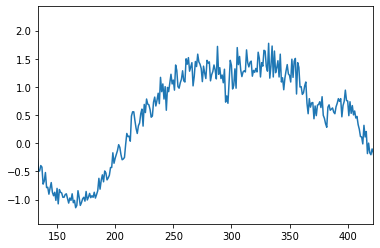

In [20]:
plt.plot(pems08_data["test_x"][:,0,0,0])
plt.xlim([134,134+288])

In [10]:
pems08_start_date = datetime.datetime.strptime("7/1/2016","%m/%d/%Y")

In [16]:
datetime.datetime.strftime(pems08_start_date+datetime.timedelta(0,300)*(train_len+\
                                                                        val_len+134),
                           "%m/%d/%Y %H:%M:%S")

'08/20/2016 00:00:00'

In [22]:
# For PeMS08
start_pos = 134
curr_day = 0
last_pos = len(pems08_data["test_x"][:,0,0,0])
first_four_hours_lst_pems08 = []
first_four_indices_pems08 = []
last_four_hours_lst_pems08 = []
last_four_indices_pems08 = []
while(start_pos + (12*24*(curr_day+1)) < last_pos):
    curr_pos = start_pos + (12*24*curr_day)
    first_four = pems08_data["test_x"][curr_pos:(curr_pos+(12*4)+2),0,0,0]
    first_four_indices_pems08.append([curr_pos,(curr_pos+(12*4)+2)])
    first_four_hours_lst_pems08.append(first_four)
    last_four = pems08_data["test_x"][(curr_pos+(12*20)-2):(curr_pos+(12*24)),0,0,0]
    last_four_indices_pems08.append([(curr_pos+(12*20)-2),(curr_pos+(12*24))])
    last_four_hours_lst_pems08.append(last_four)
    curr_day += 1

    
np.save("start_of_day_pems08.npy",first_four_indices_pems08)
_ = np.load("start_of_day_pems08.npy",allow_pickle=True)
np.save("end_of_day_pems08.npy",last_four_indices_pems08)
_ = np.load("end_of_day_pems08.npy",allow_pickle=True)

In [ ]:
smallest_intervals_0_a414 = np.load("interval_estimations_smallest_increasing_a414_0.npy",
                                   allow_pickle=True).item()

In [ ]:
start_pos = 0
curr_day = 0
last_pos = len(no_dup_test["Flow"])
first_four_hours_lst_a414 = []
first_four_indices_a414 = []
last_four_hours_lst_a414 = []
last_four_indices_a414 = []
while(start_pos + (4*24*(curr_day+1)) < last_pos):
    curr_pos = start_pos + (4*24*curr_day)
    first_four = no_dup_test["Flow"][curr_pos:(curr_pos+(4*4))]
    first_four_indices_a414.append([curr_pos,(curr_pos+(4*4))])
    first_four_hours_lst_a414.append(first_four)
    last_four = no_dup_test["Flow"][(curr_pos+(4*20)):(curr_pos+(4*24))]
    last_four_indices_a414.append([(curr_pos+(4*20)),(curr_pos+(4*24))])
    last_four_hours_lst_a414.append(last_four)
    curr_day += 1

In [ ]:
for i in range(32):
    mae_dict = dict()
    interval_first = first_four_indices_a414[np.random.choice(list(range(len(first_four_indices_a414))),
                                             size=1)[0]]
    interval_last = last_four_indices_a414[np.random.choice(list(range(len(last_four_indices_a414))),
                                      size=1)[0]]
    mae_per_interval = []
    interval = interval_first
    print("A414 Start of Day Interval", interval)
    for rep in range(100):
        new_x_test, new_y_test = return_perturbed_data(x_test, y_test, interval)
        y_test_predictions = saved_model.predict(new_x_test, batch_size=512)
        mae = (np.sum(abs(y_test_predictions-new_y_test)))/len(new_y_test)
        mae_per_interval.append(mae)
    mae_dict[str(tuple(interval))] = mae_per_interval
    np.save(f"interval_estimations_start_of_day_a414_{i}.npy", mae_dict)
    
    mae_dict = dict()
    mae_per_interval = []
    interval = interval_last
    print("A414 End of Day Interval", 
          interval)
    for rep in range(100):
        new_x_test, new_y_test = return_perturbed_data(x_test, y_test, interval)
        y_test_predictions = saved_model.predict(new_x_test, batch_size=512)
        mae = (np.sum(abs(y_test_predictions-new_y_test)))/len(new_y_test)
        mae_per_interval.append(mae)
    mae_dict[str(tuple(interval))] = mae_per_interval
    np.save(f"interval_estimations_end_of_day_a414_{i}.npy", mae_dict)
    print(f"Done with iteration {i}")

In [ ]:
all_maes_smallest_increasing = []
for i in range(8):
    smallest_intervals_0_a414 = np.load(f"interval_estimations_smallest_increasing_a414_{i}.npy",
                                   allow_pickle=True).item()
    first_mean = np.mean(smallest_intervals_0_a414['(2104, 2154)'][:25])
    second_mean = np.mean(smallest_intervals_0_a414['(2104, 2154)'][25:50])
    third_mean = np.mean(smallest_intervals_0_a414['(2104, 2154)'][50:75])
    fourth_mean = np.mean(smallest_intervals_0_a414['(2104, 2154)'][75:])
    
    all_maes_smallest_increasing += [first_mean,second_mean,third_mean,fourth_mean]

In [ ]:
all_maes_increasing = []
for i in range(8):
    increasing_intervals_0_a414 = np.load(f"interval_estimations_largest_increasing_a414_{i}.npy",
                                      allow_pickle=True).item()
    first_mean = np.mean(increasing_intervals_0_a414['(1344, 1394)'][:25])
    second_mean = np.mean(increasing_intervals_0_a414['(1344, 1394)'][25:50])
    third_mean = np.mean(increasing_intervals_0_a414['(1344, 1394)'][50:75])
    fourth_mean = np.mean(increasing_intervals_0_a414['(1344, 1394)'][75:])
    all_maes_increasing += [first_mean, second_mean, third_mean, fourth_mean]

In [ ]:
all_maes_decreasing = []
for i in range(8):
    decreasing_intervals_0_a414 = np.load(f"interval_estimations_largest_decreasing_a414_{i}.npy",
                                     allow_pickle=True).item()
    first_mean = np.mean(decreasing_intervals_0_a414['(1489, 1539)'][:25])
    second_mean = np.mean(decreasing_intervals_0_a414['(1489, 1539)'][25:50])
    third_mean = np.mean(decreasing_intervals_0_a414['(1489, 1539)'][50:75])
    fourth_mean = np.mean(decreasing_intervals_0_a414['(1489, 1539)'][75:])
    
    all_maes_decreasing += [first_mean,second_mean,third_mean,fourth_mean]
    

In [ ]:
plt.hist(all_maes_decreasing,edgecolor="black",alpha=0.1)
plt.hist(all_maes_increasing,edgecolor="black",alpha=0.1)
plt.hist(all_maes_smallest_increasing,edgecolor="black",alpha=0.1)

In [ ]:
n_trained,n_tested=64,1
timestamps_i = []
for i in range(n_trained, len(no_dup_test)-n_tested):
    timestamps_i += list(range(i,i+n_tested))

In [ ]:
y_test_predictions = saved_model.predict(x_test, batch_size=512)

In [ ]:
rmse_predictions = np.sqrt(np.sum((y_test_predictions-y_test)**2)/len(y_test))

In [ ]:
rmse_predictions

In [ ]:
plt.plot(timestamps_i,np.reshape(y_test_predictions, (2623,)),alpha=0.1,color="red")
plt.plot(timestamps_i,np.reshape(y_test, (2623,)),alpha=0.1)

In [ ]:
def ma(ts,window):
    ts_points = []
    for i in range(window,len(ts)):
        ts_points.append(np.sum(ts[(i-window):i])/window)
    return ts_points

def norm(vec):
    return np.sqrt(np.sum([x**2 for x in vec]))

def cosine_sim(vec1,vec2):
    return np.dot(vec1,vec2)/(norm(vec1)*norm(vec2))

def deltas(vec):
    diffs = []
    for i in range(1,len(vec)):
        diffs.append(vec[i]-vec[i-1])
    return diffs
# cosine similarity between pairwise difference vectors (x_i-x_{i-1})
def most_similar_segments(start_idx,end_idx,ts,k,compute_diff=False,avg_diff=False):
    cmp_window = ts[start_idx:end_idx]
    if compute_diff:
        cmp_window = deltas(cmp_window)
    window_size = end_idx-start_idx
    L = []
    heapq.heapify(L)
    num_segments = 0
    sim_to_region = dict()
    seen_segments = []
    for i in range(window_size,len(ts)):
        segment = ts[(i-window_size):i]
        if compute_diff:
            segment = deltas(segment)
        if avg_diff:
            sim = np.sum(np.array(cmp_window)-np.array(segment))/len(cmp_window)
        else:
            sim = correlate(cmp_window,segment)[0]
            #sim = cosine_sim(cmp_window,segment)
        sim = round(sim,6)
#         if i-window_size in set([2510,2259,2008,1757,1506,
#                                 1255,1004,753,502,0]):
#                 print(i-window_size,sim)
#         else:
#                 print("LOWER?:",i-window_size,sim)
        if len(seen_segments) != 0:
            if seen_segments[-1][-1] >= i-window_size:
                continue
        if num_segments < k:
            sim_to_region[sim] = list(range(i-window_size,i))
            heapq.heappush(L,sim)
            num_segments += 1
        else:
            least_sim_largest_dist = heapq.nsmallest(1,L)[0]
#             print("Keeping size:",len(L))
#             print("least_similar",least_sim_largest_dist)
            if sim >= least_sim_largest_dist: # number of segments exceeds k
#                 sim_to_region[sim] = list(range(i-window_size,i))
                # need to remove the least similar region if similarity is greater than 
                # the least similar one in the heap.
                sim_to_region[sim] = list(range(i-window_size,i))
                heapq.heappush(L,sim)
                del sim_to_region[least_sim_largest_dist]
                # here we pop the smallest element from L.
                heapq.heappop(L)
        seen_segments.append([i-window_size,i])
    return list(sim_to_region.values())

def most_similar_segments_2(start_idx,end_idx,ts,k,compute_diff=False,avg_diff=False):
    cmp_window = ts[start_idx:end_idx]
    if compute_diff:
        cmp_window = deltas(cmp_window)
    window_size = end_idx-start_idx
    L = []
    heapq.heapify(L)
    num_segments = 0
    sim_to_region = dict()
    seen_segments = []
    for size in range(window_size,int(1.25*window_size)):
        for i in range(size+1,len(ts)):
            segment = ts[(i-(size+1)):i]
            if compute_diff:
                segment = deltas(segment)
            if avg_diff:
                assert len(segment) == len(cmp_window), "cmp_window and length of segment not equivalent."
                sim = np.sum(np.array(cmp_window)-np.array(segment))/len(cmp_window)
            else:
                sim = correlate(cmp_window,segment)[0]
            sim = round(sim,6)
            if len(seen_segments) != 0:
                if seen_segments[-1][-1] >= i-size:
                    continue
            if num_segments < k:
                sim_to_region[sim] = list(range(i-size,i))
                heapq.heappush(L,sim)
                num_segments += 1
            else:
                least_sim_largest_dist = heapq.nsmallest(1,L)[0]
                if sim >= least_sim_largest_dist: # number of segments exceeds k
                    # need to remove the least similar region if similarity is greater than 
                    # the least similar one in the heap.
                    sim_to_region[sim] = list(range(i-size,i))
                    heapq.heappush(L,sim)
                    del sim_to_region[least_sim_largest_dist]
                    # here we pop the smallest element from L.
                    heapq.heappop(L)
            seen_segments.append([i-size,i])
    return list(sim_to_region.values())

In [ ]:
plot_similar_cyclic_regions(most_similar_segments_2(0,50,list(a414_test["Flow"]),20),
                            np.array(a414_test["Flow"]))

In [ ]:
'''
:brief: finds the previous interval that's not overlapping with 
the jth one.
:param: intervals
:param: j
:return: position of the non-overlapping 
interval in the list of intervals, used to index into OPT.
'''
def are_overlapping(interval_1,interval_2):
    return interval_2[0] <= interval_1[1] and interval_2[1] >= interval_1[0]
def get_prec(intervals, j):
    prec = None
    curr_idx = j-1
    while curr_idx >= 0:
        curr_interval = intervals[curr_idx]
        if (not are_overlapping(curr_interval, intervals[j])):
            prec = curr_idx
            break
        curr_idx -= 1
    return prec
'''
OPT[j] = max{OPT[prec(j)]+1,OPT[j-1]}
:brief: max_num_intervals
:param: intervals
'''
def max_num_intervals(intervals):
    intervals.sort()
    OPT = [0]*len(intervals)
    print(intervals)
    for j in range(len(intervals)):
        prec_idx = get_prec(intervals, j)
        if prec_idx is None:
            OPT[j] = (1,[intervals[j]])
        else:
            OPT[j] = ((OPT[prec_idx][0]+1), OPT[prec_idx][1]+[intervals[j]]) \
                     if (OPT[prec_idx][0]+1) > OPT[j-1][0]\
                     else OPT[j-1]
    return OPT[-1]
    

In [ ]:

'''
:brief: modify_seqs is a helper function called in get_consecutive_diffs
that finds the cumulative number of observations that are consecutively 
positive or negative
'''
def modify_seqs(prev, diffs, i, curr_seq, cons_seq, is_positive=True):
    if prev is None:
        prev = diffs[i]
    
    if ((is_positive and prev > 0 and diffs[i] > 0) or\
        ((not is_positive) and prev < 0 and diffs[i] < 0)):
        curr_seq += 1
        if (curr_seq > 1):
            cons_seq += 1
            prev = diffs[i]
    else:
        curr_seq = 0
        prev = None
    return prev, curr_seq, cons_seq

'''
:param: threshold 
:param: diffs
'''
def get_consecutive_diffs(threshold, diffs,look_at_positive_diffs=True):
    cons_seq_pos, curr_seq_pos = 0, 0
    cons_seq_neg, curr_seq_neg = 0, 0
    prev_pos, prev_neg = None, None
    for i in range(len(diffs)):
        if (look_at_positive_diffs):
            prev_pos, curr_seq_pos, cons_seq_pos = modify_seqs(prev_pos, 
                                                  diffs, 
                                                  i, 
                                                  curr_seq_pos,
                                                  cons_seq_pos)
        else:
            prev_neg, curr_seq_neg, cons_seq_neg = modify_seqs(prev_neg, 
                                                  diffs, 
                                                  i,
                                                  curr_seq_neg,
                                                  cons_seq_neg,
                                                  is_positive=False)
    # we add 1 to account for initial consecutive sequence of 2 
    # elements where we exclude the first element.
    if (look_at_positive_diffs):
        return ((cons_seq_pos+1)/len(diffs)) >= threshold
    return ((cons_seq_neg+1)/len(diffs)) >= threshold

# basic algorithm from thesis writeup.
def find_optim_changes(vec, length, k, threshold=0.6, neighbors=15, is_increasing=True, is_smallest=False):
    optim_changes = []
    heapq.heapify(optim_changes)
    for i in range(length, len(vec)):
        diffs = deltas(np.array(vec[(i-length):i]))
        smoothed_points = linear_smoother(diffs, neighbors)[1]
        if get_consecutive_diffs(threshold, smoothed_points,is_increasing):
            if is_increasing:
                diffs = list(filter(lambda x: x >= 0, diffs))
            else:
                diffs = list(filter(lambda x: x < 0, diffs))
            euclidean_norm = (-1 if is_smallest else 1)*np.sqrt(np.sum(np.square(np.array(diffs))))
            if len(optim_changes) < k:
                heapq.heappush(optim_changes, [i-length, i, euclidean_norm])
            else:
                smallest_change = heapq.nsmallest(1,optim_changes)[0][2]
                if (euclidean_norm > smallest_change):
                    low_val = heapq.heappop(optim_changes)
                    heapq.heappush(optim_changes,[i-length, i, euclidean_norm])
    optim_intervals = list(map(lambda l: l[:2], optim_changes))
    optim_intervals = max_num_intervals(optim_intervals)
    return optim_intervals
    
def optim_change(vec,length,greatest=True):
    change_start = 0 
    if (greatest):
        change = 0
    else:
        change = float('inf')
    for i in range(length, len(vec)):
        diffs = deltas(np.array(vec[(i-length):i]))
        smoothed_points = linear_smoother(diffs, 15)[1]
        euclidean_norm = np.sqrt(np.sum(np.square(np.array(diffs))))
        if (get_consecutive_diffs(0.7, smoothed_points)):
            if (greatest):
                if (euclidean_norm > change):
                    change = euclidean_norm
                    change_start = i-length
            else:
                if (euclidean_norm < change):
                    change = euclidean_norm
                    change_start = i-length
    
    return change_start

In [ ]:
# L = [[1857, 1957, 3.047289297412684],
#  [1864, 1964, 3.0827449727668896],
#  [1859, 1959, 3.0507459803599937],
#  [2019, 2119, 2.9483137773373578],
#  [1873, 1973, 3.234881948241255],
#  [1862, 1962, 3.068216895662814],
#  [1866, 1966, 3.1086561606513556],
#  [3155, 3255, 3.1609154976631246],
#  [3159, 3259, 3.0850233737889323],
#  [3160, 3260, 3.083914966101095],
#  [2308, 2408, 3.048913730507758],
#  [1863, 1963, 3.070675009256628],
#  [2298, 2398, 3.1045729022233144],
#  [2301, 2401, 3.101715983965881],
#  [3161, 3261, 3.079752970442627]]
# L = list(map(lambda l: l[:2], L))
# max_num_intervals(L)

In [ ]:
pems08_crests = [[0,50],[235,385],[530,645],[760, 810],
                 [880,920],[1050,1200],[1340,1490],
                 [1630,1770],[1910,2060],[2240,2400],
                 [2540,2640],[2780,2920],[3080,3230],[3355,3500]]
pems08_downward = [[50,125],[385,425],[645,685],[810,840],
                  [920,980],[1200,1250],[1490,1540],
                  [1770,1840],[2060,2130],[2400,2440],
                  [2640,2710],[2920,2990],[3230,3280],[3500,3567]]
pems08_troughs = [[125,185],[425,500],[685,745],[840,860],
                  [980,1030],[1250,1320],[1540,1610],
                  [1840,1890],[2130,2180],[2440,2490],
                 [2710,2760],[2990,3050],[3280,3340]]
pems08_upward = [[185, 235],[500,530],[745,760],[860,880],
                [1030,1050],[1320,1340],[1610,1630],
                [1890,1910],[2180,2240],[2490,2540],
                [2760,2780],[3050,3080],[3340,3355]]
pems08_portions = {"crests":pems08_crests,
                  "downward": pems08_downward,
                  "trouths":pems08_troughs,
                  "upward":pems08_upward}
np.save("pems08_portions.npy", pems08_portions)

In [ ]:
crests_08 = np.load("interval_estimations_crests_08.npy",allow_pickle=True).item()
for key in crests_08:
    print(key)
    if (key=="(3350, 3500)"):
        plt.hist(crests_08[key])

In [ ]:
pems04_crests = [[50,175],[360,460],[620,770],[890,1020],[1170,1310],[1480,1600],[1760,1880],[2060,2160],
                [2360,2460],[2640,2740],[2900,3050],[3190,3340]]
pems04_downward = [[175,230],[460,520],[770,800],[1020,1090],[1310,1380],[1600,1670],[1880,1970],[2160,2260],
                  [2460,2540],[2740,2820],[3050,3100],[3340,3394]]
pems04_troughs = [[230,320],[520,570],[800,860],[1090,1150],[1380,1440],[1670,1730],[1970,2020],[2260,2320],
                 [2540,2590],[2820,2880],[3100,3160]]
pems04_upward = [[0,50],[320,360],[570,620],[860,890],[1150,1170],[1440,1480],[1730,1760],[2020,2060],
                 [2320,2360],[2590,2640],[2880,2900],[3160,3190]]
pems04_portions = {"crests":pems04_crests,
                  "downward": pems04_downward,
                  "trouths":pems04_troughs,
                  "upward":pems04_upward}
np.save("pems04_portions.npy", pems04_portions)

In [ ]:
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm


In [ ]:
crests_4 = list(map(lambda x: x+["red"], pems04_crests))
downward_4 = list(map(lambda x: x+["blue"], pems04_downward))
troughs_4 = list(map(lambda x: x+["green"], pems04_troughs))
upward_4 = list(map(lambda x: x+["purple"], pems04_upward))

In [ ]:
for start,end,col in crests_4+downward_4+troughs_4+upward_4:
    plt.plot(range(start,end),pems04_data["test_x"][start:end,0,0,11],color=col)
plt.title("Highlighted Portions of PEMS04 (Upward, Crest, Downward, Trough)")
plt.ylabel("Input Feature Quantity")
plt.xlabel("Time Series Observation (t)")
plt.savefig("pems04_regions.png")

In [ ]:
crests_8 = list(map(lambda x: x+["red"], pems08_crests))
downward_8 = list(map(lambda x: x+["blue"], pems08_downward))
troughs_8 = list(map(lambda x: x+["green"], pems08_troughs))
upward_8 = list(map(lambda x: x+["purple"], pems08_upward))

In [ ]:
for start,end,col in crests_8+downward_8+troughs_8+upward_8:
    plt.plot(range(start,end),pems08_data["test_x"][start:end,0,0,11],color=col)
plt.title("Highlighted Portions of PEMS08 (Upward, Crest, Downward, Trough)")
plt.ylabel("Input Feature Quantity")
plt.xlabel("Time Series Observation (t)")
plt.savefig("pems08_regions.png")

In [ ]:
#Reading in traffic flow from a specific day.
#a414_train[a414_train["Date"].str.match("1/2/13")]["Flow"]

In [ ]:
split_date = pd.to_datetime("2/1/14 0:00")
a414_train = A414df[pd.to_datetime(A414df["Date"]) < split_date]
a414_test = A414df[pd.to_datetime(A414df["Date"]) >= split_date]

In [ ]:
# pems08_data["test_x"][:,0,0,i] at position p is the p+i forecasted observation
# of the data.
'''
RECALL that the random substitution of portions of the time series 
with future data is only on the INPUT. This lessens the amount of 
data in the input.
We may need to cut off the prediction up to the future substitution portion (portion 2).
[portion 1]....[portion 2]
'''
pems08_data["test_x"][:,0,0,11]

In [ ]:

a414_crests = [[40,70],[140,170],[220,260],[315,355],[410,450],[505,550],[605,645],
               [710,740],[810,840],[890,930],[990,1030],[1080,1120],[1180,1220],
               [1275,1315],[1385,1400],[1480,1510],[1565,1600],[1660,1700],
               [1755,1800],[1850,1890],[1945,1990],[2060,2080],[2150,2185],
               [2235,2275],[2330,2375],[2430,2470],[2525,2565],
               [2620,2660]]

a414_downward = [[70,90],[170,190],[260,280],[355,380],[450,470],[550,570],[645,665],
                 [740,760],[840,860],[930,950],[1030,1050],[1120,1140],[1220,1240],
                 [1315,1335],[1400,1440],[1510,1530],[1600,1620],[1700,1720],
                 [1800,1820],[1890,1910],[1990,2020],[2080,2110],
                 [2185,2210],[2275,2300],[2375,2400],[2470,2500],[2565,2590],
                 [2660,2688]]

a414_troughs = [[0,20],[90,120],[190,210],[280,305],[380,400],[470,500],[570,590],
                [665,690],[760,790],[860,880],[950,980],[1050,1070],[1140,1170],
                [1240,1265],[1335,1365],[1440,1460],[1530,1550],[1620,1650],
                [1720,1745],[1820,1840],[1910,1940],[2020,2035],
                [2210,2225],[2300,2320],[2400,2420],[2500,2515],[2590,2610]]

a414_upward = [[20,40],[120,140],[210,220],[305,315],[400,410],[500,505],[590,605],
               [690,710],[790,810],[880,890],[980,990],[1070,1080],[1170,1180],
               [1265,1275],[1365,1385],[1460,1480],[1550,1565],[1650,1660],
               [1745,1755],[1840,1850],[1940,1945],[2035,2060],[2140,2150],
               [2225,2235],[2320,2330],[2420, 2430],[2515,2525],
               [2610,2620]]

a414_portions = {"crests":a414_crests,
                  "downward": a414_downward,
                  "trouths": a414_troughs,
                  "upward": a414_upward}
np.save("a414_portions.npy", a414_portions)

In [ ]:
import datetime
start_date = datetime.datetime.strptime("01/01/13", "%m/%d/%y")
datetime.datetime.strftime(datetime.datetime.strptime("01/01/13", "%m/%d/%y")+datetime.timedelta(days=43),
                           "%m/%d/%y")
(datetime.datetime.strptime("01/01/13", "%m/%d/%y")+datetime.timedelta(days=0)).weekday()

In [ ]:
chunk_idx = 0
for i in range(0,len(a414_test),96):
    if (chunk_idx%2==0):
        col = "blue"
    else:
        col = "red"
    plt.plot(range(i,i+96),a414_test[i:i+96]["Flow"],
            color=col)
    chunk_idx += 1
plt.savefig("separated_days.png")

In [ ]:
chunk_idx = 0
for i in range(0,len(a414_test),96):
    weekday_num = (datetime.datetime.strptime("01/01/13", "%m/%d/%y")+\
                   datetime.timedelta(days=chunk_idx)).weekday()
    if (weekday_num in {5,6}):
        col = "green"
    else:
        col = "purple"
    plt.plot(range(i,i+96),a414_test[i:i+96]["Flow"],
            color=col)
    chunk_idx += 1
plt.savefig("weekday_weekend.png")

In [ ]:
#print(a414_test[a414_test["Date"].str.match("1/8/13")]["Flow"])
crests_a414 = list(map(lambda x: x+["red"], a414_crests))
downward_a414 = list(map(lambda x: x+["blue"], a414_downward))
troughs_a414 = list(map(lambda x: x+["green"], a414_troughs))
upward_a414 = list(map(lambda x: x+["purple"], a414_upward))
for start,end,col in crests_a414+downward_a414+troughs_a414+upward_a414:
    plt.plot(range(start,end),a414_test["Flow"][start:end],color=col)
plt.title("Highlighted Portions of A414 dataset (Upward, Crest, Downward, Trough)")
plt.ylabel("Input Feature Quantity")
plt.xlabel("Time Series Observation (t)")
plt.savefig("a414_regions.png")

In [ ]:
intervals_smallest_4 = find_optim_changes(pems04_data["test_x"][:,0,0,11], 50, 50, 0.7, 15, True)[1]
intervals_smallest_4

In [ ]:
bolden = 4
for i,interval in enumerate(intervals_smallest_4):
    density = 0.2
    if bolden==i:
        density = 0.8
    pplot(pems04_data["test_x"][interval[0]:interval[1],0,0,11],density)
plt.ylabel("Input Tensor Traffic Flow Values")
plt.xlabel("Number of 5 minute intervals after Jan. 1, 2018")
plt.title(f"Traffic Flow Smallest Changes with Boldened Interval: {intervals_smallest_4[bolden]}")
plt.savefig(f"pems04_5_smallest_bolden_{bolden}.png")

In [10]:

def plt_data(data,intervals,is_pems):
    prev_index = 0
    first_upper_bound = intervals[0][0]
    plt.plot(range(0,first_upper_bound),
             (data["test_x"][:first_upper_bound,0,0,11] if is_pems else 
             data[:first_upper_bound]),color="blue",
            alpha=0.2)
    for i in range(len(intervals)):
        plt.plot(range(intervals[i][0],intervals[i][1]),
                 data["test_x"][intervals[i][0]:intervals[i][1],0,0,11] if is_pems\
                                else data[intervals[i][0]:intervals[i][1]],color="green")
        if (i != 0):
            if (i == len(intervals)-1):
                plt.plot(range(prev_index,intervals[i][0]), 
                         data["test_x"][prev_index:intervals[i][0],0,0,11] if is_pems\
                         else data[prev_index:intervals[i][0]],color="blue",
                        alpha=0.2)
            else:
                plt.plot(range(prev_index,intervals[i][0]), 
                         data["test_x"][prev_index:intervals[i][0],0,0,11] if is_pems\
                                        else data[prev_index:intervals[i][0]],
                         color="blue",alpha=0.2)
        prev_index = intervals[i][1]
    last_idx = len(data["test_x"][:,0,0,11]) if is_pems else len(data[:])
    plt.plot(range(prev_index, last_idx), 
             data["test_x"][prev_index:last_idx,0,0,11] if is_pems\
             else data[prev_index:last_idx], color="blue",
            alpha=0.2)

# plt_data(pems04_data,intervals_smallest_4)
# plt.title("Traffic Flow Green Regions With Smallest Changes")
# plt.ylabel("Input Tensor Traffic Flow Values")
# plt.xlabel("Number of 5 minute intervals after Jan. 1, 2018")
# plt.savefig("pems04_smallest_green_regions.png")
# plt.plot(range(0,538),pems04_data["test_x"][:538,0,0,11],color="blue")
# for i in range(len(intervals_smallest_4)):
#     plt.plot(range(intervals_smallest_4[i][0],intervals_smallest_4[i][1]),
#              pems04_data["test_x"][intervals_smallest_4[i][0]:intervals_smallest_4[i][1],
#                                    0,0,11],color="green")
#     if (i != 0):
#         if (i == len(intervals_smallest_4)-1):
# #             print(intervals_smallest_4[i],prev_index,intervals_smallest_4[i][0],last_idx)
#             plt.plot(range(prev_index,intervals_smallest_4[i][0]), 
#                      pems04_data["test_x"][prev_index:intervals_smallest_4[i][0],0,0,11],color="blue")
#         else:
#             #print(intervals_smallest_4[i],prev_index,intervals_smallest_4[i][0])
#             plt.plot(range(prev_index,intervals_smallest_4[i][0]), 
#                      pems04_data["test_x"][prev_index:intervals_smallest_4[i][0],
#                                            0,0,11],color="blue")
#     prev_index = intervals_smallest_4[i][1]
# last_idx = len(pems04_data["test_x"][:,0,0,11])
# plt.plot(range(prev_index, last_idx), 
#          pems04_data["test_x"][prev_index:last_idx,0,0,11],color="blue")

In [ ]:
# note as of 6/8/2022, these are positive increases.
intervals_largest_4 = find_optim_changes(pems04_data["test_x"][:,0,0,11], 50, 50, 0.7, 5, False)[1]

In [ ]:
intervals_largest_decreasing_4 = find_optim_changes(pems04_data["test_x"][:,0,0,11], 
                                                    50, 40, 0.6, 5, False, False)[1]
intervals_largest_decreasing_4

In [ ]:
bolden = 4

for i,interval in enumerate(intervals_largest_decreasing_4):
    density = 0.2
    if bolden==i:
        density = 0.8
    pplot(pems04_data["test_x"][interval[0]:interval[1],0,0,11],density)
plt.ylabel("Input Tensor Traffic Flow Values")
plt.xlabel("Number of 5 minute intervals after Jan. 1, 2018")
plt.title(f"Traffic Flow Smallest Changes with Boldened Interval: {intervals_largest_decreasing_4[bolden]}")
plt.savefig(f"pems04_6_largest_decreasing_bolden_{bolden}.png")


In [ ]:
plt_data(pems04_data, intervals_largest_decreasing_4)
plt.title("Traffic Flow Green Regions With Largest Decreases")
plt.ylabel("Input Tensor Traffic Flow Values")
plt.xlabel("Number of 5 minute intervals after Jan. 1, 2018")
plt.savefig("pems04_largest_decreasing_green_regions.png")

In [6]:
intervals_smallest_increasing_8 = find_optim_changes(pems08_data["test_x"][:,0,0,11], 
                                                    50, 10, 
                                                    0.8, 15, True, True)[1]

[[1277, 1327], [1560, 1610], [2154, 2204], [2164, 2214], [2460, 2510], [2462, 2512], [2463, 2513], [2467, 2517], [2468, 2518], [3005, 3055]]


In [ ]:
intervals_smallest_increasing_8

In [ ]:
plt.plot(pems08_data["test_x"][1277:1327,0,0,11])

In [ ]:
plt_data(pems08_data, intervals_smallest_increasing_8)
plt.title("Traffic Flow Green Regions With Smallest Increases")
plt.ylabel("Input Tensor Traffic Flow Values")
plt.xlabel("Number of 5 minute intervals after Jan. 1, 2018")
plt.savefig("pems08_smallest_increasing_green_regions.png")

In [7]:
intervals_largest_increasing_8 = find_optim_changes(pems08_data["test_x"][:,0,0,11], 
                                                    50, 15, 
                                                    0.7, 5, True, False)[1]

[[727, 777], [735, 785], [737, 787], [1286, 1336], [1288, 1338], [1308, 1358], [1572, 1622], [1574, 1624], [2745, 2795], [2747, 2797], [3013, 3063], [3015, 3065], [3032, 3082], [3033, 3083], [3035, 3085]]


In [ ]:
intervals_largest_increasing_8

In [ ]:
plt_data(pems08_data, intervals_largest_increasing_8)
plt.title("Traffic Flow Green Regions With Largest Increases")
plt.ylabel("Input Tensor Traffic Flow Values")
plt.xlabel("Number of 5 minute intervals after Jan. 1, 2018")
plt.savefig("pems08_largest_increasing_green_regions.png")

In [8]:
intervals_largest_decreasing_8 = find_optim_changes(pems08_data["test_x"][:,0,0,11], 
                                                    50, 12, 
                                                    0.6, 5, False, False)[1]
intervals_largest_decreasing_8

[[919, 969], [936, 986], [938, 988], [943, 993], [1195, 1245], [1216, 1266], [1218, 1268], [1220, 1270], [1491, 1541], [1818, 1868], [3219, 3269], [3221, 3271]]


[[943, 993], [1195, 1245], [1491, 1541], [1818, 1868], [3219, 3269]]

In [ ]:
plt_data(pems08_data, intervals_largest_decreasing_8)
plt.title("Traffic Flow Green Regions With Largest Decreases")
plt.ylabel("Input Tensor Traffic Flow Values")
plt.xlabel("Number of 5 minute intervals after Jan. 1, 2018")
plt.savefig("pems08_largest_decreasing_green_regions.png")

In [ ]:
intervals_largest_decreasing_a414 = find_optim_changes(x_test[:,0,2], 
                                                    16, 10, 
                                                    0.9, 2, False, False)[1]
intervals_largest_decreasing_a414

intervals_largest_increasing_a414 = find_optim_changes(x_test[:,0,2], 
                                                    16, 25, 
                                                    0.6, 2, True, False)[1]
intervals_largest_increasing_a414

intervals_smallest_increasing_a414 = find_optim_changes(x_test[:,0,2], 
                                                    16, 20, 
                                                    0.30, 2, True, True)[1]
intervals_smallest_increasing_a414

In [ ]:
for interval in intervals_largest_decreasing_a414:
    pplot(x_test[:,0,2][interval[0]:interval[1]],0.2)
plt.title("Traffic Flow Green Regions With Largest Decreases")
plt.ylabel("Input Tensor Traffic Flow Values")
plt.xlabel("Number of 15 minute intervals after 2/1/2014")
plt.savefig("a414_largest_decreasing_5_regions.png")

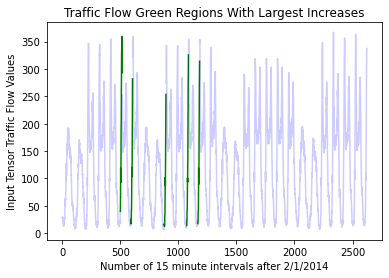

In [11]:
plt_data(x_test[:,0,2], intervals_largest_increasing_a414,False)
# plt.xlim([17500,len(x_test[:,0,2])])
plt.title("Traffic Flow Green Regions With Largest Increases")
plt.ylabel("Input Tensor Traffic Flow Values")
plt.xlabel("Number of 15 minute intervals after 2/1/2014")
plt.savefig("a414_largest_increasing_green_regions.png")

In [ ]:
bolden = 0

for i,interval in enumerate(intervals_largest_increasing_8):
    density = 0.2
    if bolden==i:
        density = 0.8
    pplot(pems08_data["test_x"][interval[0]:interval[1],0,0,11],density)
plt.ylabel("Input Tensor Traffic Flow Values")
plt.xlabel("Number of 5 minute intervals after Jan. 1, 2018")
plt.title(f"Traffic Flow Smallest Changes with Boldened Interval: {intervals_smallest_4[bolden]}")
plt.savefig(f"pems04_5_smallest_bolden_{bolden}.png")

In [ ]:
plt_data(pems08_data,intervals_largest_decreasing_8)
plt.title("PeMS08: Traffic Flow Green Regions With Largest Changes")
plt.ylabel("Input Tensor Traffic Flow Values")
plt.xlabel("Number of 5 minute intervals after Jan. 1, 2018")
plt.savefig("pems08_largest_green_regions.png")

In [ ]:
# plt_data(pems04_data,intervals_largest_4)
# plt.title("Traffic Flow Green Regions With Largest Changes")
# plt.ylabel("Input Tensor Traffic Flow Values")
# plt.xlabel("Number of 5 minute intervals after Jan. 1, 2018")
# plt.savefig("pems04_largest_green_regions.png")

In [ ]:
bolden = 4
for i,interval in enumerate(intervals_largest_4):
    density = 0.2
    if bolden==i:
        density = 0.8
    pplot(pems04_data["test_x"][interval[0]:interval[1],0,0,11],density)
plt.ylabel("Input Tensor Traffic Flow Values")
plt.xlabel("Number of 5 minute intervals after Jan. 1, 2018")
plt.title(f"Traffic Flow Largest Changes with Boldened Interval: {intervals_largest_4[bolden]}")
plt.savefig(f"pems04_5_largest_bolden_{bolden}.png")

In [ ]:
# PEMS08 average speeds
def plot_similar_cyclic_regions(indices, ts):
    indices = sorted(indices, key=lambda x: x[0])
    lsts_idx_excluded = []
    curr_end = None
    #plt.plot(list(range(250)),pems8_data[250:500,0,0],color="yellow")
    plt.figure(figsize=(3, 3))
    # we assume non-overlapping indices
    for i,index_lst in enumerate(indices):
        plt.plot(index_lst,ts[index_lst],color="purple")
        if i == len(indices)-1:
            indices_to_end = list(range(index_lst[-1],len(ts)))
            plt.plot(indices_to_end,
                     ts[indices_to_end],
                    color="cyan")
        else:
            indices_in_between = list(range(index_lst[-1],indices[i+1][0]))
            plt.plot(indices_in_between,
                     ts[indices_in_between],
                    color="cyan")
        if i == 0 and index_lst[0] > 0:
            plt.plot(list(range(0,index_lst[0])),ts[:index_lst[0]],color="green")
        plt.figure(figsize=(3, 3))
    plt.show()
# cyan is data in the time series that aren't part of the most similar regions.
# 

In [ ]:
predictions_ASTGCN = np.load('output_epoch_65_test.npz')

In [ ]:
detector = 5
plt.plot(predictions_ASTGCN["input"][:,detector,0,1])

In [ ]:
plt.plot(predictions_ASTGCN["data_target_tensor"][:,detector,0])

In [ ]:
detector = 0
predicted_ts = predictions_ASTGCN["prediction"][:,detector,2]
plt.plot(list(range(len(predicted_ts))),predicted_ts,
         linewidth=1, color="darkblue",label="predicted")
true_ts = predictions_ASTGCN["data_target_tensor"][:,detector,2]
plt.plot(list(range(len(true_ts))),true_ts,
         linewidth=0.2,color="darkorange")



In [ ]:
def pairwise_diff(vec1,vec2):
    assert type(vec1) == type(vec2) and type(vec1) == np.ndarray
    return vec1-vec2

In [ ]:
arr = np.load("./interval_estimations_1_geometric.npy",allow_pickle=True)
arr2 = np.load("./interval_estimations_2_geometric.npy",allow_pickle=True)

In [ ]:
downward_08 = np.load("./interval_estimations_downward_08.npy",allow_pickle=True).item()
troughs_08 = np.load("interval_estimations_trouths_08.npy", allow_pickle=True).item()
upward_08 = np.load("interval_estimations_upward_08.npy", allow_pickle=True).item()

In [ ]:
high_04_iter0 = np.load("./interval_estimations_high_4.npy", allow_pickle=True).item()

In [ ]:
high_04_iter1 = np.load("./interval_estimations_high_4_0.npy", allow_pickle=True).item()
high_04_iter2 = np.load("./interval_estimations_high_4_1.npy", allow_pickle=True).item()
high_04_iter3 = np.load("./interval_estimations_high_4_2.npy", allow_pickle=True).item()
high_04_iter4 = np.load("./interval_estimations_high_4_3.npy", allow_pickle=True).item()
high_04_iter5 = np.load("./interval_estimations_high_4_4.npy", allow_pickle=True).item()
high_04_iter6 = np.load("./interval_estimations_high_4_5.npy", allow_pickle=True).item()
high_04_iter7 = np.load("./interval_estimations_high_4_6.npy", allow_pickle=True).item()

In [ ]:
low_04_iter1 = np.load("./interval_estimations_low_4_0.npy",allow_pickle=True).item()

In [ ]:
low_04_iter0 = np.load("./interval_estimations_low_4.npy",allow_pickle=True).item()

In [ ]:
means = []
for lst in [high_04_iter0['(1142, 1192)'][:25],
           high_04_iter0['(1142, 1192)'][25:50],
           high_04_iter0['(1142, 1192)'][50:75],
           high_04_iter0['(1142, 1192)'][75:]]:
#            high_04_iter3['(1142, 1192)'][:25],
#            high_04_iter3['(1142, 1192)'][25:50],
#            high_04_iter3['(1142, 1192)'][50:75],
#            high_04_iter3['(1142, 1192)'][75:],
#            high_04_iter4['(1142, 1192)'][:25],
#            high_04_iter4['(1142, 1192)'][25:50],
#            high_04_iter4['(1142, 1192)'][50:75],
#            high_04_iter4['(1142, 1192)'][75:],
#            high_04_iter5['(1142, 1192)'][:25],
#            high_04_iter5['(1142, 1192)'][25:50],
#            high_04_iter5['(1142, 1192)'][50:75],
#            high_04_iter5['(1142, 1192)'][75:],
#            high_04_iter6['(1142, 1192)'][:25],
#            high_04_iter6['(1142, 1192)'][25:50],
#            high_04_iter6['(1142, 1192)'][50:75],
#            high_04_iter6['(1142, 1192)'][75:],
#            high_04_iter7['(1142, 1192)'][:25],
#            high_04_iter7['(1142, 1192)'][25:50],
#            high_04_iter7['(1142, 1192)'][50:75],
#            high_04_iter7['(1142, 1192)'][75:]]:
    means.append(np.mean(lst))
low_means = []
for lst in [low_04_iter0['(538, 588)'][:25],
           low_04_iter0['(538, 588)'][25:50],
           low_04_iter0['(538, 588)'][50:75],
           low_04_iter0['(538, 588)'][75:]]:
    low_means.append(np.mean(lst))
plt.hist(means,
        color="magenta",
         edgecolor="black",
         alpha=0.1,
        label="High")

plt.hist(low_means,
        color="blue",
         edgecolor="black",
         alpha=0.1, label="Low")
plt.xticks(rotation=90)
plt.title("High and Low Rates of Change MAE")
plt.ylabel("Count")
plt.xlabel("MAE over 11 prediction points")
plt.legend(loc="best")
plt.savefig("first_iter_pems04_high_low.png")

In [ ]:
plt.hist(high_04_iter1['(1142, 1192)'][:25],
        color="magenta",
         edgecolor="black",
         alpha=0.1)
plt.hist(high_04_iter1['(1142, 1192)'][25:50],
        color="magenta",
         edgecolor="black",
         alpha=0.1)

plt.hist(high_04_iter2['(1142, 1192)'][:25],
        color="magenta",
         edgecolor="black",
         alpha=0.1)
plt.hist(high_04_iter2['(1142, 1192)'][25:50],
        color="magenta",
         edgecolor="black",
         alpha=0.1)
plt.hist(high_04_iter3['(1142, 1192)'][:25],
        color="magenta",
         edgecolor="black",
         alpha=0.1)
plt.hist(high_04_iter3['(1142, 1192)'][25:50],
        color="magenta",
         edgecolor="black",
         alpha=0.1)
plt.hist(high_04_iter3['(1142, 1192)'][50:75],
        color="magenta",
         edgecolor="black",
         alpha=0.1)
plt.hist(high_04_iter3['(1142, 1192)'][75:],
        color="magenta",
         edgecolor="black",
         alpha=0.1)

In [ ]:
high_changes = arr.item()
high_change_lst = []
for key in high_changes:
    high_change_lst += high_changes[key]
    print(key)
# print(high_04_iter1["(737, 787)"][:25])

# print(high_04_iter1.keys(),high_04_iter1['(1142, 1192)'])



# high_change_plot = plt.hist(high_changes['(737, 787)'],
#           color="blue",
#          edgecolor="black",
#          alpha=0.1)

low_changes = arr2.item()
low_change_lst = []
for key in low_changes:
    low_change_lst += low_changes[key]
    
crests = []
for key in crests_08:
    crests += crests_08[key]

downward = []
for key in downward_08:
    downward += downward_08[key]

    
troughs = []
for key in troughs_08:
    troughs += troughs_08[key]

upward = []
for key in upward_08:
    upward += upward_08[key]


# plt.hist(downward,
#         color="green",\
#          edgecolor="black",
#          alpha=0.1)

# plt.hist(troughs,
#         color="red",
#          edgecolor="black",
#          alpha=0.1)

plt.hist(high_changes["(737, 787)"][:25],
        color="magenta",
         edgecolor="black",
         alpha=0.1)
plt.hist(high_changes["(737, 787)"][25:50],
        color="blue",
         edgecolor="black",
         alpha=0.1)
plt.hist(high_changes["(737, 787)"][50:75],
        color="green",
         edgecolor="black",
         alpha=0.1)
plt.hist(high_changes["(737, 787)"][75:100],
        color="red",
         edgecolor="black",
         alpha=0.1)


# low_change_plot = plt.hist(low_changes['(2154, 2204)'],
#         color="green",
#          edgecolor="black",
#          alpha=0.1)
# downward_08["(2920, 2990)"]
# plt.hist(upward_08["(2180, 2240)"],
#         color="green",
#          edgecolor="black",
#          alpha=0.1)
# plt.hist(downward_08["(2920, 2990)"],
#         color="orange",
#          edgecolor="black",
#          alpha=0.1)
# plt.hist(crests_08['(3350, 3500)'],
#         color="red",
#         edgecolor="black",
#         alpha=0.075)

In [ ]:
plt.hist((crests-(np.mean(crests)))/np.std(crests),
         edgecolor="black",alpha=0.75)
plt.hist((troughs-(np.mean(troughs)))/np.std(troughs),
         edgecolor="black",alpha=0.75)

In [ ]:
# crest_changes_1 = crests_08['(3350, 3500)']
# n1 = len(crest_changes_1)
# high_changes_1 = high_changes['(737, 787)']
# n2 = len(high_changes_1)
n1 = len(crests)
n2 = len(troughs)
mean_diff_1 = np.mean(crests)-np.mean(troughs)
# pooled_var_1 = (((n1-1)*np.var(low_changes_1))+((n2-1)*np.var(high_changes_1)))/(n1+n2-2)
initial_t_stat = mean_diff_1/(np.sqrt((np.var(crests,ddof=1)/n1)+\
                                      (np.var(troughs,ddof=1)/n2)))
print(initial_t_stat)

In [ ]:
def produce_new_samples(samp1,samp2):
    overall_mean = np.mean(samp1+samp2)
    # Agnostic of any distributional - bootstrapping.
    new_samp1 = samp1-np.mean(samp1)+overall_mean
    new_samp2 = samp2-np.mean(samp2)+overall_mean
    return new_samp1, new_samp2

upward_new, crests_new = produce_new_samples(upward, tmp_crests)

crests_new, troughs_new = produce_new_samples(crests, troughs)

num_samples = 2*10**4
num_larger = 0
for sample in range(num_samples):
    resampled_1 = np.random.choice(troughs, len(troughs),replace=True)
    n1 = len(resampled_1)
    resampled_2 = np.random.choice(crests, len(crests),replace=True)
    n2 = len(resampled_2)
    #pooled_var = (((n1-1)*np.var(resampled_low))+((n2-1)*np.var(resampled_high)))/(n1+n2-2)
    size_var = np.sqrt((np.var(resampled_1,ddof=1)/n1)+(np.var(resampled_2,ddof=1)/n2))
#     print(np.mean(resampled_1)-np.mean(resampled_2), size_var)
    t_stat = (np.mean(resampled_2)-np.mean(resampled_1))/size_var
    if t_stat >= initial_t_stat:
        num_larger += 1
print(num_larger)
print(num_larger/num_samples)

In [ ]:
from scipy import stats
stats.ttest_ind(crests, troughs, equal_var = False)

In [ ]:
plt.hist(low_change_lst,
          color="blue",
         edgecolor="black",
         alpha=0.1)
plt.hist(high_change_lst,
        color="green",
         edgecolor="black",
         alpha=0.1)
plt.title("Estimated MAE over high (green) and low (purple) rate of change regions.")
plt.ylabel("Count")
plt.xlabel("MAE over 11 prediction points")
plt.savefig("all_high_and_low_mae.png")

In [ ]:
plt.hist(low_changes['(1560, 1610)'],
          color="blue",
         edgecolor="black",
         alpha=0.1)
plt.hist(high_changes['(737, 787)'],
        color="green",
         edgecolor="black",
         alpha=0.1)
plt.title("Estimated MAE over high (green) and low (purple) rate of change regions.")
plt.ylabel("Count")
plt.xlabel("MAE over 11 prediction points")
plt.savefig("low_and_high_changes_hist.png")

In [6]:
pems08_data = np.load("../ASTGCN-r-pytorch-master/data/PEMS08/PEMS08_r1_d0_w0_astcgn.npz")
pems04_data = np.load("../ASTGCN-r-pytorch-master/data/PEMS04/PEMS04_r1_d0_w0_astcgn.npz")
A414df = pd.read_csv("A414.csv")
def pplot(vec,alpha_val):
    plt.plot(list(range(len(vec))), vec,alpha=alpha_val)
def plt_attr(col_name):
    plt.plot(list(range(len(pems04_data[col_name][:,0,0]))), pems04_data[col_name][:,0,0])
def swap(x,y):
    temp = x
    x = y
    y = temp
    return x,y
'''
:brief: sample_similar_segments - prints the .
:param:
:param: ref_portion - 
:param: kwargs - key word arguments
:return: 
'''

def average(L):
    if len(L) == 0:
        return 0
    return sum(L)/len(L)
def add_on_reciprocal(diff):
    if diff == 0:
        add_on = float('inf')
    else:
        add_on = 1/diff
    return add_on



# Noise Reduction Techniques
def linear_smoother(ts, num_neighbors, weight_method="gaussian"):
    averaged_points = []
    # every 20 points
    points_to_include = []
    for i in range(len(ts)):
        closest = []
        heapq.heapify(closest)
        downward, upward = i, i
        if weight_method == "gaussian":
            under_neighbors = i-num_neighbors
            above_neighbors = i+num_neighbors
            while under_neighbors <= downward and under_neighbors >= 0 and\
                  i+num_neighbors >= upward and above_neighbors < len(ts):
                # sorts by the first element of tuple
                if len(closest) >= num_neighbors:
                    heapq.heappop(closest)
                else:
                    heapq.heappush(closest,(add_on_reciprocal(i-downward),ts[downward]))
                if (len(closest) >= num_neighbors):
                    heapq.heappop(closest)
                else:
                    heapq.heappush(closest,(add_on_reciprocal(upward-i), ts[upward]))  
                
                downward -= 1
                upward += 1
            while under_neighbors <= downward and under_neighbors >= 0:
                if len(closest) >= num_neighbors:
                    heapq.heappop(closest)
                else:
                    heapq.heappush(closest,(add_on_reciprocal(i-downward),ts[downward]))
                downward -= 1           
            while i+num_neighbors >= upward and above_neighbors < len(ts):
                if len(closest) >= num_neighbors:
                    heapq.heappop(closest)
                else:
                    heapq.heappush(closest,(add_on_reciprocal(upward-i), ts[upward]))   
                upward += 1
            heap_items = list(map(lambda x: x[1], [heapq.heappop(closest) \
                                                       for i in range(len(closest))]))
            avg = average(heap_items)
            averaged_points.append(avg)
            # we collect twice as many points as total/num_neighbors
            if (i%(num_neighbors//2) == 0):
                points_to_include.append(avg)
        else:
            # rather than a weighted average of nearest data points, 
            # we take ordinary average.
            pass
    return averaged_points, points_to_include

# Optional: Remove duplicates
def rows_to_keep_no_dups(df, var):
    rows_keep = []
    prev = None
    for i in range(len(df)):
        if not prev or (df.iloc[i][var] != prev):
            # either the first row or distinct value.
            rows_keep.append(i)
        prev = df.iloc[i][var]
    return rows_keep

def max_min_normalize(df):
    return (df-df.min())/(df.max()-df.min())

# Create A414 dataset split
split_date = pd.to_datetime("2/1/14 0:00")
no_dup_train = A414df[pd.to_datetime(A414df["Date"]) < split_date]
no_dup_test = A414df[pd.to_datetime(A414df["Date"]) >= split_date]


'''
:param: n_past - 
:param: n_future - 
:return: 2-tuple of the training sets for x and y.
'''
def produce_x_y(n_trained, n_tested, df,_vars,target_var):
    x, y = [],[]
    for i in range(n_trained, len(df)-n_tested+1):
        x.append(np.array(df[_vars])[i-n_trained:i,:])
        y.append(np.array(df[target_var])[i:i+n_tested])
    return np.array(x), np.array(y)
def make_train_data_windows(n_trained, n_tested, df_train, df_test, _vars, target_var):
    x_train, y_train = produce_x_y(n_trained, n_tested, df_train,_vars, target_var)
    x_val, y_val = produce_x_y(n_trained, n_tested, df_test,_vars, target_var)
    return x_train, y_train, x_val, y_val

x_train, y_train, x_test, y_test = make_train_data_windows(64, 1, no_dup_train, no_dup_test,
                                           ["AverageJT","AverageSpeed","Flow"], "Flow")

split_point = int(len(x_train)*0.8)
x_train, x_val = x_train[:split_point,:,:], x_train[split_point:,:,:]
split_point = int(len(y_train)*0.8)
y_train, y_val = y_train[:split_point,:], y_train[split_point:,:]

saved_model = tf.keras.models.load_model("./model_best_weights_4.h5")
saved_model.evaluate(x_test, y_test, batch_size=512)

def return_perturbed_data(x_test, y_test, interval):
    new_x_test, new_y_test = probing_model_predictions.perturb_data(x_test, y_test,
                                                            [interval[0], interval[1]],
                                                            0, 3, 10, 0, "mc_sample_strumbelj")
    new_x_test = np.append(x_test[:,:,0],np.append(x_test[:,:,1],new_x_test)).reshape(x_test.shape)
    return new_x_test, new_y_test


  

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
2624/2624 [==============================] - 2s 621us/sample - loss: 402.2772 - mean_squared_error: 402.2773


In [7]:
def ma(ts,window):
    ts_points = []
    for i in range(window,len(ts)):
        ts_points.append(np.sum(ts[(i-window):i])/window)
    return ts_points

def norm(vec):
    return np.sqrt(np.sum([x**2 for x in vec]))

def cosine_sim(vec1,vec2):
    return np.dot(vec1,vec2)/(norm(vec1)*norm(vec2))

def deltas(vec):
    diffs = []
    for i in range(1,len(vec)):
        diffs.append(vec[i]-vec[i-1])
    return diffs
# cosine similarity between pairwise difference vectors (x_i-x_{i-1})
def most_similar_segments(start_idx,end_idx,ts,k,compute_diff=False,avg_diff=False):
    cmp_window = ts[start_idx:end_idx]
    if compute_diff:
        cmp_window = deltas(cmp_window)
    window_size = end_idx-start_idx
    L = []
    heapq.heapify(L)
    num_segments = 0
    sim_to_region = dict()
    seen_segments = []
    for i in range(window_size,len(ts)):
        segment = ts[(i-window_size):i]
        if compute_diff:
            segment = deltas(segment)
        if avg_diff:
            sim = np.sum(np.array(cmp_window)-np.array(segment))/len(cmp_window)
        else:
            sim = correlate(cmp_window,segment)[0]
            #sim = cosine_sim(cmp_window,segment)
        sim = round(sim,6)
#         if i-window_size in set([2510,2259,2008,1757,1506,
#                                 1255,1004,753,502,0]):
#                 print(i-window_size,sim)
#         else:
#                 print("LOWER?:",i-window_size,sim)
        if len(seen_segments) != 0:
            if seen_segments[-1][-1] >= i-window_size:
                continue
        if num_segments < k:
            sim_to_region[sim] = list(range(i-window_size,i))
            heapq.heappush(L,sim)
            num_segments += 1
        else:
            least_sim_largest_dist = heapq.nsmallest(1,L)[0]
#             print("Keeping size:",len(L))
#             print("least_similar",least_sim_largest_dist)
            if sim >= least_sim_largest_dist: # number of segments exceeds k
#                 sim_to_region[sim] = list(range(i-window_size,i))
                # need to remove the least similar region if similarity is greater than 
                # the least similar one in the heap.
                sim_to_region[sim] = list(range(i-window_size,i))
                heapq.heappush(L,sim)
                del sim_to_region[least_sim_largest_dist]
                # here we pop the smallest element from L.
                heapq.heappop(L)
        seen_segments.append([i-window_size,i])
    return list(sim_to_region.values())

def most_similar_segments_2(start_idx,end_idx,ts,k,compute_diff=False,avg_diff=False):
    cmp_window = ts[start_idx:end_idx]
    if compute_diff:
        cmp_window = deltas(cmp_window)
    window_size = end_idx-start_idx
    L = []
    heapq.heapify(L)
    num_segments = 0
    sim_to_region = dict()
    seen_segments = []
    for size in range(window_size,int(1.25*window_size)):
        for i in range(size+1,len(ts)):
            segment = ts[(i-(size+1)):i]
            if compute_diff:
                segment = deltas(segment)
            if avg_diff:
                assert len(segment) == len(cmp_window), "cmp_window and length of segment not equivalent."
                sim = np.sum(np.array(cmp_window)-np.array(segment))/len(cmp_window)
            else:
                sim = correlate(cmp_window,segment)[0]
            sim = round(sim,6)
            if len(seen_segments) != 0:
                if seen_segments[-1][-1] >= i-size:
                    continue
            if num_segments < k:
                sim_to_region[sim] = list(range(i-size,i))
                heapq.heappush(L,sim)
                num_segments += 1
            else:
                least_sim_largest_dist = heapq.nsmallest(1,L)[0]
                if sim >= least_sim_largest_dist: # number of segments exceeds k
                    # need to remove the least similar region if similarity is greater than 
                    # the least similar one in the heap.
                    sim_to_region[sim] = list(range(i-size,i))
                    heapq.heappush(L,sim)
                    del sim_to_region[least_sim_largest_dist]
                    # here we pop the smallest element from L.
                    heapq.heappop(L)
            seen_segments.append([i-size,i])
    return list(sim_to_region.values())
'''
:brief: finds the previous interval that's not overlapping with 
the jth one.
:param: intervals
:param: j
:return: position of the non-overlapping 
interval in the list of intervals, used to index into OPT.
'''
def are_overlapping(interval_1,interval_2):
    return interval_2[0] <= interval_1[1] and interval_2[1] >= interval_1[0]
def get_prec(intervals, j):
    prec = None
    curr_idx = j-1
    while curr_idx >= 0:
        curr_interval = intervals[curr_idx]
        if (not are_overlapping(curr_interval, intervals[j])):
            prec = curr_idx
            break
        curr_idx -= 1
    return prec
'''
OPT[j] = max{OPT[prec(j)]+1,OPT[j-1]}
:brief: max_num_intervals
:param: intervals
'''
def max_num_intervals(intervals):
    intervals.sort()
    OPT = [0]*len(intervals)
    print(intervals)
    for j in range(len(intervals)):
        prec_idx = get_prec(intervals, j)
        if prec_idx is None:
            OPT[j] = (1,[intervals[j]])
        else:
            OPT[j] = ((OPT[prec_idx][0]+1), OPT[prec_idx][1]+[intervals[j]]) \
                     if (OPT[prec_idx][0]+1) > OPT[j-1][0]\
                     else OPT[j-1]
    return OPT[-1]


'''
:brief: modify_seqs is a helper function called in get_consecutive_diffs
that finds the cumulative number of observations that are consecutively 
positive or negative
'''
def modify_seqs(prev, diffs, i, curr_seq, cons_seq, is_positive=True):
    if prev is None:
        prev = diffs[i]
    
    if ((is_positive and prev > 0 and diffs[i] > 0) or\
        ((not is_positive) and prev < 0 and diffs[i] < 0)):
        curr_seq += 1
        if (curr_seq > 1):
            cons_seq += 1
            prev = diffs[i]
    else:
        curr_seq = 0
        prev = None
    return prev, curr_seq, cons_seq

'''
:param: threshold 
:param: diffs
'''
def get_consecutive_diffs(threshold, diffs,look_at_positive_diffs=True):
    cons_seq_pos, curr_seq_pos = 0, 0
    cons_seq_neg, curr_seq_neg = 0, 0
    prev_pos, prev_neg = None, None
    for i in range(len(diffs)):
        if (look_at_positive_diffs):
            prev_pos, curr_seq_pos, cons_seq_pos = modify_seqs(prev_pos, 
                                                  diffs, 
                                                  i, 
                                                  curr_seq_pos,
                                                  cons_seq_pos)
        else:
            prev_neg, curr_seq_neg, cons_seq_neg = modify_seqs(prev_neg, 
                                                  diffs, 
                                                  i,
                                                  curr_seq_neg,
                                                  cons_seq_neg,
                                                  is_positive=False)
    # we add 1 to account for initial consecutive sequence of 2 
    # elements where we exclude the first element.
    if (look_at_positive_diffs):
        return ((cons_seq_pos+1)/len(diffs)) >= threshold
    return ((cons_seq_neg+1)/len(diffs)) >= threshold

# basic algorithm from thesis writeup.
def find_optim_changes(vec, length, k, threshold=0.6, neighbors=15, is_increasing=True, is_smallest=False):
    optim_changes = []
    heapq.heapify(optim_changes)
    for i in range(length, len(vec)):
        diffs = deltas(np.array(vec[(i-length):i]))
        smoothed_points = linear_smoother(diffs, neighbors)[1]
        if get_consecutive_diffs(threshold, smoothed_points,is_increasing):
            if is_increasing:
                diffs = list(filter(lambda x: x >= 0, diffs))
            else:
                diffs = list(filter(lambda x: x < 0, diffs))
            euclidean_norm = (-1 if is_smallest else 1)*np.sqrt(np.sum(np.square(np.array(diffs))))
            if len(optim_changes) < k:
                heapq.heappush(optim_changes, [i-length, i, euclidean_norm])
            else:
                smallest_change = heapq.nsmallest(1,optim_changes)[0][2]
                if (euclidean_norm > smallest_change):
                    low_val = heapq.heappop(optim_changes)
                    heapq.heappush(optim_changes,[i-length, i, euclidean_norm])
    optim_intervals = list(map(lambda l: l[:2], optim_changes))
    optim_intervals = max_num_intervals(optim_intervals)
    return optim_intervals
    
def optim_change(vec,length,greatest=True):
    change_start = 0 
    if (greatest):
        change = 0
    else:
        change = float('inf')
    for i in range(length, len(vec)):
        diffs = deltas(np.array(vec[(i-length):i]))
        smoothed_points = linear_smoother(diffs, 15)[1]
        euclidean_norm = np.sqrt(np.sum(np.square(np.array(diffs))))
        if (get_consecutive_diffs(0.7, smoothed_points)):
            if (greatest):
                if (euclidean_norm > change):
                    change = euclidean_norm
                    change_start = i-length
            else:
                if (euclidean_norm < change):
                    change = euclidean_norm
                    change_start = i-length
    
    return change_start
    

In [8]:
intervals_largest_decreasing_a414 = find_optim_changes(x_test[:,0,2], 
                                                    16, 10, 
                                                    0.9, 2, False, False)[1]
print(intervals_largest_decreasing_a414)

intervals_largest_increasing_a414 = find_optim_changes(x_test[:,0,2], 
                                                    16, 25, 
                                                    0.6, 2, True, False)[1]
print(intervals_largest_increasing_a414)

intervals_smallest_increasing_a414 = find_optim_changes(x_test[:,0,2], 
                                                    16, 20, 
                                                    0.30, 2, True, True)[1]
print(intervals_smallest_increasing_a414)

[[644, 660], [645, 661], [764, 780], [765, 781], [1029, 1045], [1030, 1046], [1316, 1332], [1317, 1333], [1604, 1620], [1605, 1621]]
[[645, 661], [764, 780], [1029, 1045], [1316, 1332], [1604, 1620]]
[[495, 511], [496, 512], [497, 513], [498, 514], [499, 515], [589, 605], [590, 606], [591, 607], [592, 608], [593, 609], [594, 610], [595, 611], [596, 612], [877, 893], [878, 894], [880, 896], [881, 897], [1071, 1087], [1072, 1088], [1073, 1089], [1074, 1090], [1075, 1091], [1076, 1092], [1167, 1183], [1168, 1184]]
[[499, 515], [589, 605], [877, 893], [1071, 1087], [1167, 1183]]
[[194, 210], [195, 211], [196, 212], [197, 213], [236, 252], [237, 253], [292, 308], [293, 309], [294, 310], [323, 339], [324, 340], [325, 341], [326, 342], [327, 343], [328, 344], [329, 345], [330, 346], [1918, 1934], [1919, 1935], [1922, 1938]]
[[197, 213], [236, 252], [292, 308], [323, 339], [1918, 1934]]


In [ ]:
y_test_predictions = saved_model.predict(x_test, batch_size=512)
mae = (np.sum(abs(y_test_predictions-y_test)))/len(y_test)
print(mae)

In [9]:
start_pos = 0
curr_day = 0
last_pos = len(no_dup_test["Flow"])
first_four_hours_lst_a414 = []
first_four_indices_a414 = []
last_four_hours_lst_a414 = []
last_four_indices_a414 = []
while(start_pos + (4*24*(curr_day+1)) < last_pos):
    curr_pos = start_pos + (4*24*curr_day)
    first_four = no_dup_test["Flow"][curr_pos:(curr_pos+(4*4))]
    first_four_indices_a414.append([curr_pos,(curr_pos+(4*4))])
    first_four_hours_lst_a414.append(first_four)
    last_four = no_dup_test["Flow"][(curr_pos+(4*20)):(curr_pos+(4*24))]
    last_four_indices_a414.append([(curr_pos+(4*20)),(curr_pos+(4*24))])
    last_four_hours_lst_a414.append(last_four)
    curr_day += 1

# just using up to 32.
# for i in range(60,100):
#     mae_dict = dict()
#     interval_first = first_four_indices_a414[np.random.choice(list(range(len(first_four_indices_a414))),
#                                              size=1)[0]]
#     interval_last = last_four_indices_a414[np.random.choice(list(range(len(last_four_indices_a414))),
#                                       size=1)[0]]
#     mae_per_interval = []
#     interval = interval_first
#     print("A414 Start of Day Interval", interval)
#     for rep in range(100):
#         new_x_test, new_y_test = return_perturbed_data(x_test, y_test, interval)
#         y_test_predictions = saved_model.predict(new_x_test, batch_size=512)
#         mae = (np.sum(abs(y_test_predictions-new_y_test)))/len(new_y_test)
#         mae_per_interval.append(mae)
#     mae_dict[str(tuple(interval))] = mae_per_interval
#     np.save(f"interval_estimations_start_of_day_a414_{i}.npy", mae_dict)
    
#     mae_dict = dict()
#     mae_per_interval = []
#     interval = interval_last
#     print("A414 End of Day Interval", 
#           interval)
#     for rep in range(100):
#         new_x_test, new_y_test = return_perturbed_data(x_test, y_test, interval)
#         y_test_predictions = saved_model.predict(new_x_test, batch_size=512)
#         mae = (np.sum(abs(y_test_predictions-new_y_test)))/len(new_y_test)
#         mae_per_interval.append(mae)
#     mae_dict[str(tuple(interval))] = mae_per_interval
#     np.save(f"interval_estimations_end_of_day_a414_{i}.npy", mae_dict)
#     print(f"Done with iteration {i}")

A414 Start of Day Interval [2400, 2416]
A414 End of Day Interval [1616, 1632]
Done with iteration 0
A414 Start of Day Interval [288, 304]
A414 End of Day Interval [2384, 2400]
Done with iteration 1
A414 Start of Day Interval [96, 112]
A414 End of Day Interval [656, 672]
Done with iteration 2
A414 Start of Day Interval [288, 304]
A414 End of Day Interval [2192, 2208]
Done with iteration 3
A414 Start of Day Interval [2400, 2416]
A414 End of Day Interval [176, 192]
Done with iteration 4
A414 Start of Day Interval [2112, 2128]
A414 End of Day Interval [1712, 1728]
Done with iteration 5
A414 Start of Day Interval [192, 208]
A414 End of Day Interval [944, 960]
Done with iteration 6
A414 Start of Day Interval [2304, 2320]
A414 End of Day Interval [272, 288]
Done with iteration 7
A414 Start of Day Interval [2400, 2416]
A414 End of Day Interval [1520, 1536]
Done with iteration 8
A414 Start of Day Interval [672, 688]
A414 End of Day Interval [80, 96]
Done with iteration 9
A414 Start of Day Inter

KeyboardInterrupt: 

In [8]:
# intervals_largest_decreasing_a414
# intervals_largest_increasing_a414
# intervals_smallest_increasing_a414
def return_perturbed_data(x_test, y_test, interval):
    new_x_test, new_y_test = probing_model_predictions.perturb_data(x_test, y_test,
                                                            [interval[0], interval[1]],
                                                            0, 3, 10, 0, "mc_sample_strumbelj")
    new_x_test = np.append(x_test[:,:,0],np.append(x_test[:,:,1],new_x_test)).reshape(x_test.shape)
    return new_x_test, new_y_test

for i in range(0,8):
    mae_dict = dict()
    for interval in intervals_largest_decreasing_a414:
        mae_per_interval = []
        for rep in range(100):
            new_x_test, new_y_test = return_perturbed_data(x_test,y_test,interval)
            y_test_predictions = saved_model.predict(new_x_test, batch_size=512)
            mae = (np.sum(abs(y_test_predictions-new_y_test)))/len(new_y_test)
            mae_per_interval.append(mae)
        mae_dict[str(tuple(interval))] = mae_per_interval 
        print(f"Iteration {i}, Interval", interval)
    print(f"After intervals loop, Iteration {i}")
    np.save(f"interval_estimations_largest_decreasing_a414_{i}.npy", mae_dict)

Iteration 0, Interval [645, 661]
Iteration 0, Interval [764, 780]
Iteration 0, Interval [1029, 1045]
Iteration 0, Interval [1316, 1332]
Iteration 0, Interval [1604, 1620]
After intervals loop, Iteration 0
Iteration 1, Interval [645, 661]
Iteration 1, Interval [764, 780]
Iteration 1, Interval [1029, 1045]
Iteration 1, Interval [1316, 1332]
Iteration 1, Interval [1604, 1620]
After intervals loop, Iteration 1
Iteration 2, Interval [645, 661]
Iteration 2, Interval [764, 780]
Iteration 2, Interval [1029, 1045]
Iteration 2, Interval [1316, 1332]
Iteration 2, Interval [1604, 1620]
After intervals loop, Iteration 2
Iteration 3, Interval [645, 661]
Iteration 3, Interval [764, 780]
Iteration 3, Interval [1029, 1045]
Iteration 3, Interval [1316, 1332]
Iteration 3, Interval [1604, 1620]
After intervals loop, Iteration 3
Iteration 4, Interval [645, 661]
Iteration 4, Interval [764, 780]
Iteration 4, Interval [1029, 1045]
Iteration 4, Interval [1316, 1332]
Iteration 4, Interval [1604, 1620]
After int